In [2]:
#import the necessary libraries
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np #for scientific computation
import pandas as pd #for DataFrames and data cleaning processes
import seaborn as sns #for data visualisation and outliers indentification using the box plot,heatmap,scatterplot
import matplotlib.pyplot as plt # for data visualization in bar,line,hist,piechart and many more
from sklearn.preprocessing import StandardScaler #for numerical model building
from sklearn.preprocessing import OneHotEncoder #for categoorical model building

In [4]:
#Reading my data from the my datasets from a .csv to dataframe

In [5]:
#Ignoring the index of the dataset
Ndata = pd.read_csv("rubaba_nutrional_analysis.csv")

In [6]:
#Exploring my data for clearning 

In [7]:
# cheking the size of my data using shape
Ndata.shape

(171, 13)

In [8]:
#Checking for the data information
Ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 13 columns):
 #   Column                                                                                                                                                                                                                                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                            --------------  ----- 
 0   Timestamp                                                                                                                                                                                     

In [9]:
#Checking for the first five rows of my data
Ndata.sample(10)

,Timestamp,Email Address,Choose the name of the region you come from,"Age range(yrs), If none choose the approximate age range",Choose your gender,Educational Level,Enter your monthly income in Ghana cedis,Enter your weight in kilograms(kg),Enter your height in meters(m),Which of the following food nutrients do you consume most during Winter ( Rainy Season),Which of the following food nutrients do you consume most during Summer ( Dry Season),Do you perform any body exercise?,"From the following list of diseases, choose the type of disease that you commonly experience, if none choose the on that your family member(s) usually get. (Scurvy, Rickets, Beriberi, Pellagra, Anemia, Goiter, Kwashiorkor, Marasmus, Obesity, Hypervitaminosis, Hypercalcemia, Hyperphosphatemia, Hyperlipidemia, Diabetes)"
15,12/15/2024 20:39:43,NaN,Greater Accra Region,15-20,Female,Tertiary,6000,53,1.67 m,Carbohydrates,Carbohydrates,No,None
7,12/15/2024 20:06:57,NaN,Northen Region,15-20,Male,NaN,10 cidis,30 kilograms,4/11 h,Vitamin,Protein,Yes,Malaria
81,12/16/2024 21:24:16,NaN,Upper east Region,20-25,Female,Tertiary,400,62,9,Vitamin,Protein,Yes,None
86,12/17/2024 0:36:56,NaN,Upper east Region,20-25,Male,Tertiary,0-100,67,2,Vitamin,Carbohydrates,No,Obesity
148,12/20/2024 19:43:10,NaN,Upper West Region,15-20,Male,High School,NaN,40,7,Vitamin,Carbohydrates,Yes,None
32,12/16/2024 6:39:48,NaN,Central Region,15-20,Male,Tertiary,NaN,65,185,Carbohydrates,Carbohydrates,Yes,Peptic ulcer
92,12/17/2024 8:26:21,NaN,Upper east Region,30-35,Male,Tertiary,NaN,49,3,Fats,Protein,Yes,Stomach ulcer
167,12/23/2024 7:52:43,NaN,Upper east Region,20-25,Male,Tertiary,20,64,171,Carbohydrates,Vitamin,Yes,Anemia
154,12/21/2024 7:29:20,NaN,Upper east Region,25-30,Female,Tertiary,None,55,5.5,Protein,Vitamin,Yes,Obesity
112,12/19/2024 19:55:28,NaN,Upper east Region,25-30,Male,Tertiary,800,60kg,700,Carbohydrates,Protein,Yes,Beriberi


In [10]:
#Checking for the sum of null values in my data
Ndata.isnull().sum()

Timestamp                                                                                                                                                                                                                                                                                                                             0
Email Address                                                                                                                                                                                                                                                                                                                       169
Choose the name of the region you come from                                                                                                                                                                                                                                                                                           0
Age range(yrs), 

In [11]:
#Checking for the sum of duplicates
Ndata.duplicated().sum()

0

In [12]:
#Describe to see the statistical summary of the data before clearning using the describe
Ndata.describe()

,Timestamp,Email Address,Choose the name of the region you come from,"Age range(yrs), If none choose the approximate age range",Choose your gender,Educational Level,Enter your monthly income in Ghana cedis,Enter your weight in kilograms(kg),Enter your height in meters(m),Which of the following food nutrients do you consume most during Winter ( Rainy Season),Which of the following food nutrients do you consume most during Summer ( Dry Season),Do you perform any body exercise?,"From the following list of diseases, choose the type of disease that you commonly experience, if none choose the on that your family member(s) usually get. (Scurvy, Rickets, Beriberi, Pellagra, Anemia, Goiter, Kwashiorkor, Marasmus, Obesity, Hypervitaminosis, Hypercalcemia, Hyperphosphatemia, Hyperlipidemia, Diabetes)"
count,171,2,171,171,171,170,125,169,169,171,171,169,145
unique,171,2,16,6,2,3,69,85,122,6,6,2,42
top,12/15/2024 18:28:04,ayaabafatawusumaila@gmail.com,Ashanti Region,20-25,Male,Tertiary,0,60,5.6,Carbohydrates,Carbohydrates,Yes,Anemia
freq,1,1,44,86,108,127,14,12,5,103,106,109,24


In [13]:
#CLEANING OF THE DATA

In [14]:
#Changing the columns names using rename() function
columnName = {
              "Email Address":"Remove",
              "Choose the name of the region you come from":"Region",
              "Age range(yrs), If none choose the approximate age range":"Age_Range",
              "Choose your gender":"Gender",
              "Educational Level":"Education_Level",
              "Enter your monthly income in Ghana cedis":"Monthly_Income",
              "Enter your weight in kilograms(kg)":"weight(Kg)",
              "Enter your height in meters(m)":"Height(m)",
              "Which of the following food nutrients do you consume most during Winter ( Rainy Season)":"Rainy_Season",
              "Which of the following food nutrients do you consume most during Summer ( Dry Season)":"Dry_Season",
              "Do you perform any body exercise?":"Body_Exercise",
              "From the following list of diseases, choose the type of disease that you commonly experience, if none choose the on that your family member(s) usually get.  (Scurvy, Rickets, Beriberi, Pellagra, Anemia, Goiter, Kwashiorkor, Marasmus, Obesity, Hypervitaminosis, Hypercalcemia, Hyperphosphatemia, Hyperlipidemia, Diabetes)":"Diseases"
                 
}

In [15]:
#Renaming the columns and inplacing the recent columns
Ndata.rename(columns=columnName,inplace=True)

In [16]:
Ndata.head(2)

,Timestamp,Remove,Region,Age_Range,Gender,Education_Level,Monthly_Income,weight(Kg),Height(m),Rainy_Season,Dry_Season,Body_Exercise,Diseases
0,12/15/2024 18:28:04,ayaabafatawusumaila@gmail.com,Ashanti Region,20-25,Male,Tertiary,560,67,2,Carbohydrates,Protein,Yes,Anemia
1,12/15/2024 18:45:00,abdulhakimzakariram@gmail.com,Bono East Region,20-25,Male,Tertiary,2k Cedis,80kg,1m,Carbohydrates,Carbohydrates,Yes,Obesity


In [17]:
#Checking the number of values of the Remove column
Ndata["Remove"].count()

2

In [18]:
# checking the percentage of the empty rows
(Ndata.isnull().sum()/Ndata.shape[0])*100

Timestamp           0.000000
Remove             98.830409
Region              0.000000
Age_Range           0.000000
Gender              0.000000
Education_Level     0.584795
Monthly_Income     26.900585
weight(Kg)          1.169591
Height(m)           1.169591
Rainy_Season        0.000000
Dry_Season          0.000000
Body_Exercise       1.169591
Diseases           15.204678
dtype: float64

In [19]:
#From the percentage above drop the 'Remove' and 'Timestamp' columns

In [20]:
Ndata.drop(columns="Remove",inplace=True)

In [21]:
(Ndata.isnull().sum()/Ndata.shape[0])*100

Timestamp           0.000000
Region              0.000000
Age_Range           0.000000
Gender              0.000000
Education_Level     0.584795
Monthly_Income     26.900585
weight(Kg)          1.169591
Height(m)           1.169591
Rainy_Season        0.000000
Dry_Season          0.000000
Body_Exercise       1.169591
Diseases           15.204678
dtype: float64

In [22]:
#Changing the Index to Timestamp
Ndata.set_index(Ndata.Timestamp,inplace=True)

In [23]:
#Correcting the portions with ['Monthly_Income','Education_Level','weight(Kg)','Height(m)','Body_Exercise','Diseases']

In [24]:
#Solving for the numerical problems in the Monthly 
Ndata.Monthly_Income = Ndata.Monthly_Income.str.replace("k","000",regex=False)
Ndata.Monthly_Income = Ndata.Monthly_Income.str.replace("K","000",regex=False)

#Removing the Ghc,ghc and gh portion of the data
Ndata.Monthly_Income = Ndata.Monthly_Income.str.replace("gh","",regex=False)
Ndata.Monthly_Income = Ndata.Monthly_Income.str.replace("ghc","",regex=False)
Ndata.Monthly_Income = Ndata.Monthly_Income.str.replace("GHC","",regex=False)
Ndata.Monthly_Income = Ndata.Monthly_Income.str.replace("Cedies","",regex=False)
Ndata.Monthly_Income = Ndata.Monthly_Income.str.replace("Ghc","",regex=False)
Ndata.Monthly_Income = Ndata.Monthly_Income.str.replace("c","",regex=False)
Ndata.Monthly_Income = Ndata.Monthly_Income.str.replace("C","",regex=False)


#Getting the numerical parts of the Monthly_Income
Ndata.Monthly_Income = Ndata.Monthly_Income.str.extract('(\d+)')
Ndata.Monthly_Income = Ndata.Monthly_Income.str.replace("ft","",regex=False).astype(float).round(3)



In [25]:
#selecting the numerical portion of the dataframe
Ndata.select_dtypes(include="number").columns

Index(['Monthly_Income'], dtype='object')

In [26]:
#Finding the mean income

income_mean = Ndata.Monthly_Income.mean()
income_mean = round(income_mean,3)
income_mean

1192.091

In [27]:
#Checking for the unique columns in the dataframe
Ndata.nunique()

Timestamp          171
Region              16
Age_Range            6
Gender               2
Education_Level      3
Monthly_Income      30
weight(Kg)          85
Height(m)          122
Rainy_Season         6
Dry_Season           6
Body_Exercise        2
Diseases            42
dtype: int64

In [28]:
# Getting the portion of the data from 50% position to 100%
Ndata[int(Ndata.shape[0]/2):Ndata.shape[0]].head(2)

,Timestamp,Region,Age_Range,Gender,Education_Level,Monthly_Income,weight(Kg),Height(m),Rainy_Season,Dry_Season,Body_Exercise,Diseases
Timestamp,,,,,,,,,,,,
12/17/2024 0:32:24,12/17/2024 0:32:24,Savannah Region,20-25,Male,Tertiary,100.0,65.7,5.8,Carbohydrates,Carbohydrates,Yes,NaN
12/17/2024 0:36:56,12/17/2024 0:36:56,Upper east Region,20-25,Male,Tertiary,0.0,67,2,Vitamin,Carbohydrates,No,Obesity


In [29]:
#Filling the NaN values using
Ndata["Monthly_Income"] = Ndata["Monthly_Income"].interpolate()


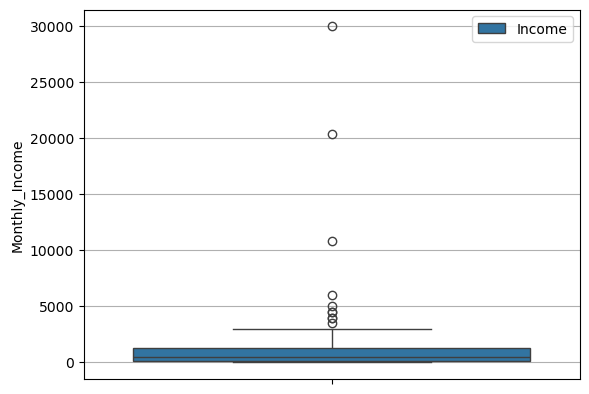

In [30]:
#drawing a boxplot to check for outliers
plt.grid()
sns.boxplot(Ndata.Monthly_Income,label="Income")
plt.legend()
plt.show()

In [31]:
#Dropping the values greater then 6000
drop_income_portion = Ndata.Monthly_Income < 6000
Ndata = Ndata[drop_income_portion]

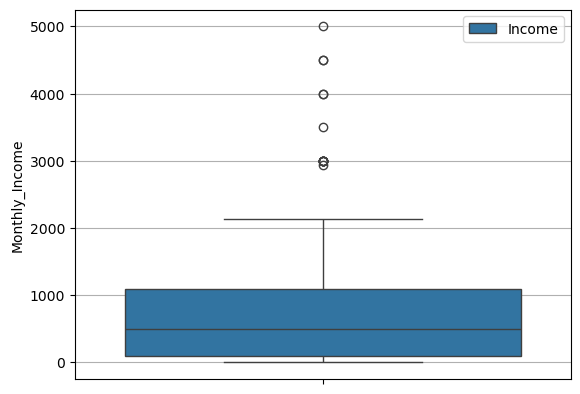

In [32]:
#600 portion has being dropped
plt.grid()
sns.boxplot(Ndata.Monthly_Income,label="Income")
plt.legend()
plt.show()

In [33]:
Ndata.Monthly_Income.max()

5000.0

In [34]:
Ndata.Monthly_Income = round(Ndata.Monthly_Income,2)
for i in (Ndata.Monthly_Income < 400):
    Ndata.Monthly_Income.replace(i,4000,regex=False)

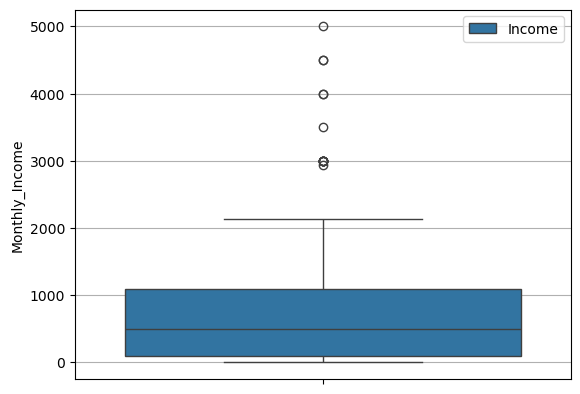

In [35]:
plt.grid()
sns.boxplot(Ndata.Monthly_Income,label="Income")
plt.legend()
plt.show()

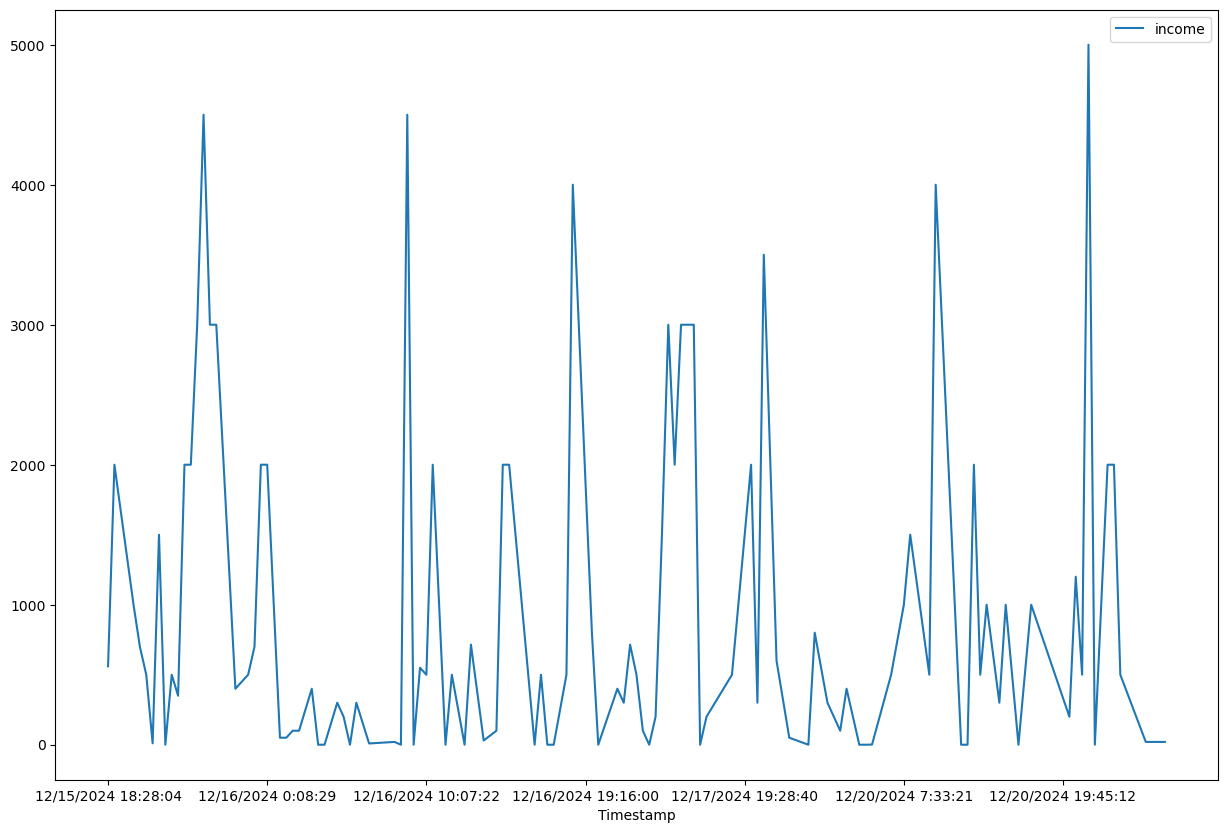

<Figure size 640x480 with 0 Axes>

In [36]:
#Using the time series data to check for the variation of the income with time
plt.figure(figsize=(15,10))
Ndata.Monthly_Income.plot(label="income")
plt.legend(loc="best")
plt.show()
#save my the graph as an image
plt.savefig("time.png");

In [37]:
Ndata.head()

,Timestamp,Region,Age_Range,Gender,Education_Level,Monthly_Income,weight(Kg),Height(m),Rainy_Season,Dry_Season,Body_Exercise,Diseases
Timestamp,,,,,,,,,,,,
12/15/2024 18:28:04,12/15/2024 18:28:04,Ashanti Region,20-25,Male,Tertiary,560.00,67,2,Carbohydrates,Protein,Yes,Anemia
12/15/2024 18:45:00,12/15/2024 18:45:00,Bono East Region,20-25,Male,Tertiary,2000.00,80kg,1m,Carbohydrates,Carbohydrates,Yes,Obesity
12/15/2024 19:24:42,12/15/2024 19:24:42,Ashanti Region,20-25,Female,Tertiary,1666.67,0.5kg,1.93 meters,Carbohydrates,Vitamin,Yes,Anemia
12/15/2024 19:40:47,12/15/2024 19:40:47,Upper east Region,20-25,Male,Tertiary,1333.33,56,4.5m,Carbohydrates,Vitamin,NaN,Kwashiorkor
12/15/2024 19:53:18,12/15/2024 19:53:18,Upper east Region,20-25,Male,Tertiary,1000.00,67,1.9,Carbohydrates,Protein,Yes,None of these


In [38]:
#Cleaning of the weight of the data

In [39]:
#Replacing the unwanted data from the weight data column

Ndata["weight(Kg)"] = Ndata["weight(Kg)"].str.replace("Kg","",regex=False)
Ndata["weight(Kg)"] = Ndata["weight(Kg)"].str.replace("KG","",regex=False)
Ndata["weight(Kg)"] = Ndata["weight(Kg)"].str.replace("k","",regex=False)
Ndata["weight(Kg)"] = Ndata["weight(Kg)"].str.replace("g","",regex=False)
Ndata["weight(Kg)"] = Ndata["weight(Kg)"].str.replace("K","",regex=False)
Ndata["weight(Kg)"] = Ndata["weight(Kg)"].str.replace("ilorams","",regex=False)

Ndata["weight(Kg)"] = Ndata["weight(Kg)"].str.extract('(\d+)').astype(float)
#Extracting only the numerical portion of the data



#Checking to see whether the weight ids part of the numerical columns
Ndata.select_dtypes(include="number").columns

#finding the mean weight of the data
Ndata["weight(Kg)"].interpolate()

Timestamp
12/15/2024 18:28:04    67.0
12/15/2024 18:45:00    80.0
12/15/2024 19:24:42     0.0
12/15/2024 19:40:47    56.0
12/15/2024 19:53:18    67.0
                       ... 
12/22/2024 18:26:06    62.0
12/23/2024 7:52:43     64.0
12/23/2024 18:36:05    55.0
12/25/2024 8:33:56     58.0
12/26/2024 5:36:07     56.0
Name: weight(Kg), Length: 167, dtype: float64

In [40]:
Ndata["weight(Kg)"].bfill()

Timestamp
12/15/2024 18:28:04    67.0
12/15/2024 18:45:00    80.0
12/15/2024 19:24:42     0.0
12/15/2024 19:40:47    56.0
12/15/2024 19:53:18    67.0
                       ... 
12/22/2024 18:26:06    62.0
12/23/2024 7:52:43     64.0
12/23/2024 18:36:05    55.0
12/25/2024 8:33:56     58.0
12/26/2024 5:36:07     56.0
Name: weight(Kg), Length: 167, dtype: float64

In [41]:
Ndata.head()

,Timestamp,Region,Age_Range,Gender,Education_Level,Monthly_Income,weight(Kg),Height(m),Rainy_Season,Dry_Season,Body_Exercise,Diseases
Timestamp,,,,,,,,,,,,
12/15/2024 18:28:04,12/15/2024 18:28:04,Ashanti Region,20-25,Male,Tertiary,560.00,67.0,2,Carbohydrates,Protein,Yes,Anemia
12/15/2024 18:45:00,12/15/2024 18:45:00,Bono East Region,20-25,Male,Tertiary,2000.00,80.0,1m,Carbohydrates,Carbohydrates,Yes,Obesity
12/15/2024 19:24:42,12/15/2024 19:24:42,Ashanti Region,20-25,Female,Tertiary,1666.67,0.0,1.93 meters,Carbohydrates,Vitamin,Yes,Anemia
12/15/2024 19:40:47,12/15/2024 19:40:47,Upper east Region,20-25,Male,Tertiary,1333.33,56.0,4.5m,Carbohydrates,Vitamin,NaN,Kwashiorkor
12/15/2024 19:53:18,12/15/2024 19:53:18,Upper east Region,20-25,Male,Tertiary,1000.00,67.0,1.9,Carbohydrates,Protein,Yes,None of these


In [42]:
Ndata["weight(Kg)"].isnull().sum()

5

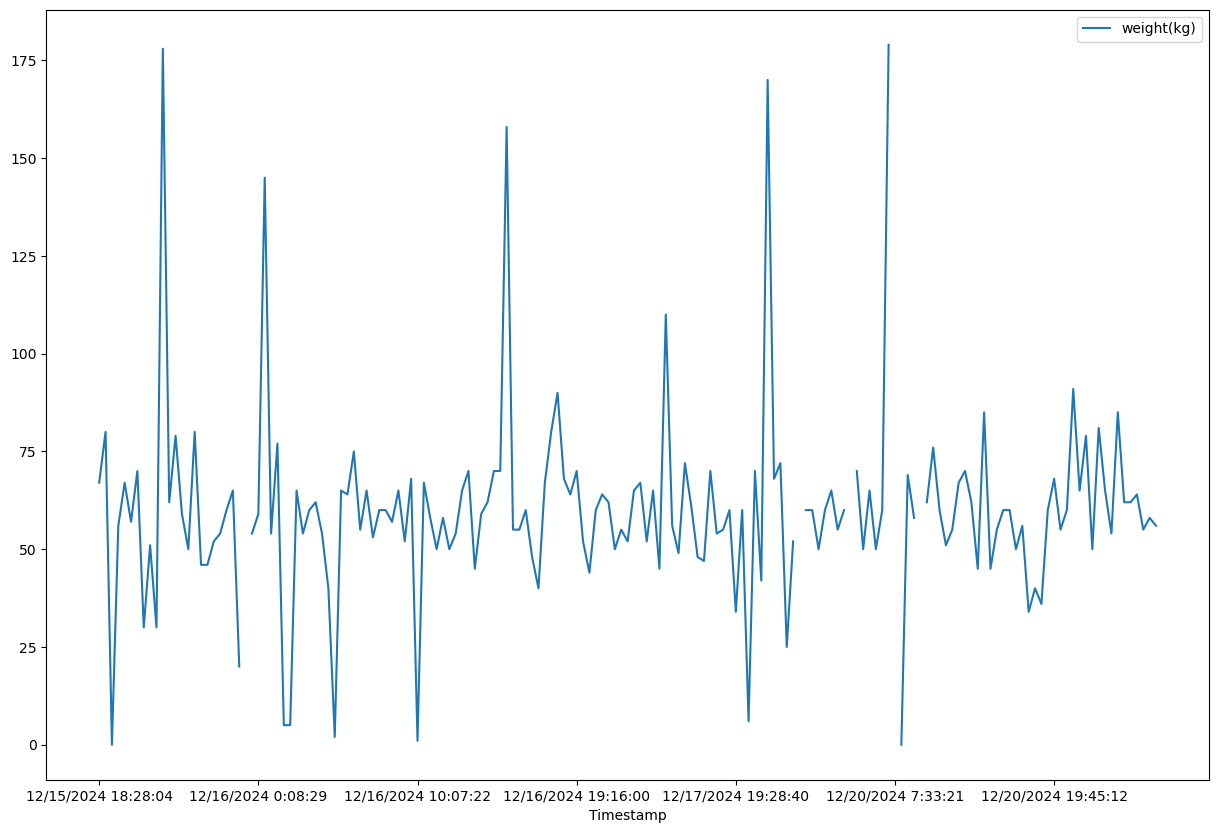

In [43]:
plt.figure(figsize=(15,10))
Ndata["weight(Kg)"].plot(label="weight(kg)")
plt.legend()
plt.show()

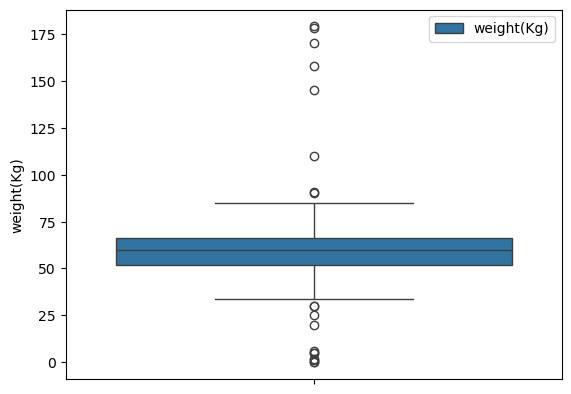

In [44]:
#Using a boxplot to check for outliers in the weight
sns.boxplot(Ndata["weight(Kg)"],label="weight(Kg)")
plt.legend()
plt.show()

In [45]:
#Dropping the outliers of the weight
weight_small = (Ndata["weight(Kg)"] > 29) 
weight_big = (Ndata["weight(Kg)"] < 95) 

In [46]:
Ndata = Ndata[weight_small & weight_big]

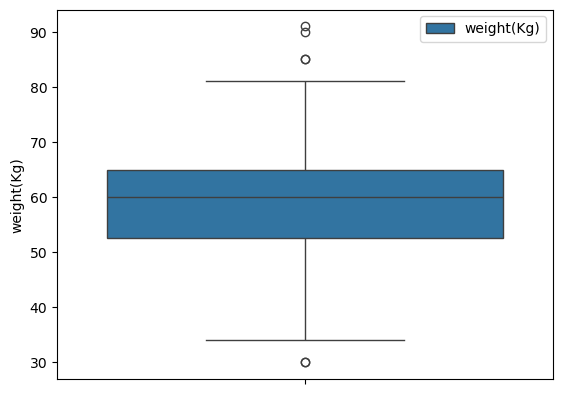

In [47]:
#Using a boxplot to check whether the outliers have being dropped from the weight
sns.boxplot(Ndata["weight(Kg)"],label="weight(Kg)")
plt.legend()
plt.show()

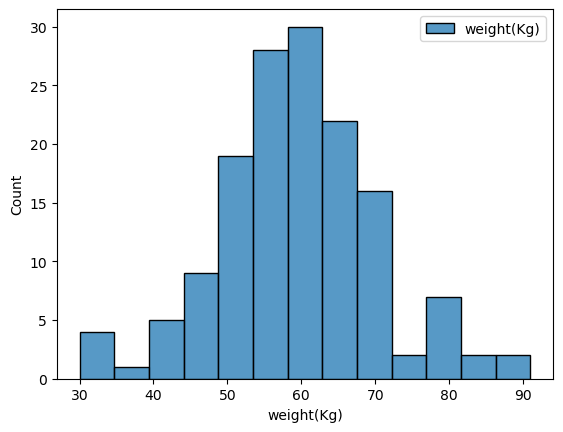

In [48]:
#Using a histogram to know the number of peoples within a particular weight 
sns.histplot(Ndata["weight(Kg)"],label="weight(Kg)")
plt.legend()
plt.show()

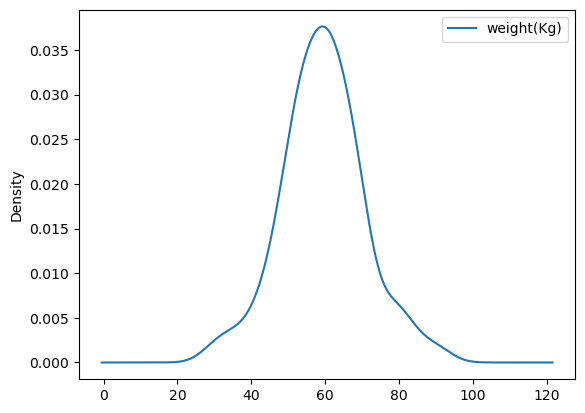

In [49]:
#Using a density plot to check for the distribution of the weight
plt.grid()
Ndata["weight(Kg)"].plot(kind="kde",label="weight(Kg)")
plt.legend()
plt.show()

In [50]:
#Cleaning the Height(m) portion of the data
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace("m","",regex=False)
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace("M","",regex=False)
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace("meter","",regex=False)
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace("ft",".",regex=False)

Ndata["Height(m)"] = Ndata["Height(m)"].str.replace("'","1.7",regex=False)
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace(",",".",regex=False)

Ndata["Height(m)"] = Ndata["Height(m)"].str.replace("/",".",regex=False)
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace("4.2+","2.4",regex=False)
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace("1.2.","1.2",regex=False)
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace("5’6","1.6",regex=False)
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace("h","1.6",regex=False)

Ndata["Height(m)"] = Ndata["Height(m)"].str.replace("2+","2",regex=False)



Ndata["Height(m)"] = Ndata["Height(m)"].str.replace("feet",".",regex=False)

#Ndata["Height(m)"] = Ndata["Height(m)"].str.extract('(\d+)').astype(float)
#Extracting only the numerical portion of the data



#Checking to see whether the weight ids part of the numerical columns
Ndata.select_dtypes(include="number").columns

#finding the mean weight of the data


Index(['Monthly_Income', 'weight(Kg)'], dtype='object')

In [51]:
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace("2.4+","1.5",regex=False)
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace("eters","",regex=False)
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace("I","1",regex=False)
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace("4.51.6","1.6",regex=False)
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace("Don1.7t know","2",regex=False)
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace("fit","1.6",regex=False)
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace("4.11 1.6","1.6",regex=False)
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace('''"''',".",regex=False)
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace(''' .''',"2.1",regex=False)
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace('''Don’t know''',"1.8",regex=False)
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace('''No idea''',"1.8",regex=False)
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace("-","1.5",regex=False)
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace("4.51.6","1.5",regex=False)
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace("160etre","1.5",regex=False)
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace("52.1 9","1.9",regex=False)
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace("52.1 7","1.7",regex=False)
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace("Don1.7t no","1.7",regex=False)



In [52]:
Ndata["Height(m)"] = Ndata["Height(m)"].str.replace("1.5+","2",regex=False).astype(float)
Ndata["Height(m)"].interpolate()

Timestamp
12/15/2024 18:28:04      2.0
12/15/2024 18:45:00      1.0
12/15/2024 19:40:47      4.5
12/15/2024 19:53:18      1.9
12/15/2024 20:02:32      4.7
                       ...  
12/22/2024 18:26:06      5.4
12/23/2024 7:52:43     171.0
12/23/2024 18:36:05    162.0
12/25/2024 8:33:56       1.6
12/26/2024 5:36:07       1.7
Name: Height(m), Length: 147, dtype: float64

<Axes: xlabel='Timestamp'>

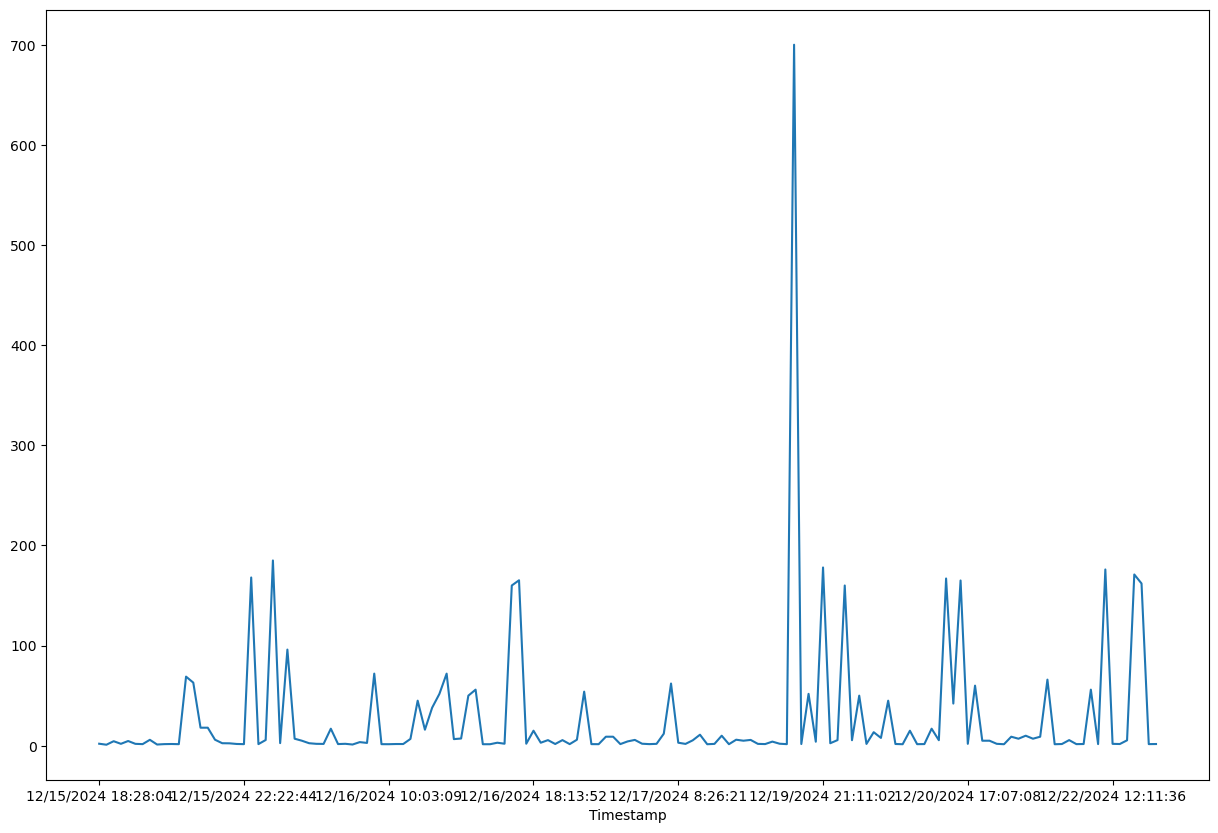

In [53]:
plt.figure(figsize=(15,10))
Ndata["Height(m)"].plot()

In [54]:

heatm = Ndata.select_dtypes(include="number").corr()

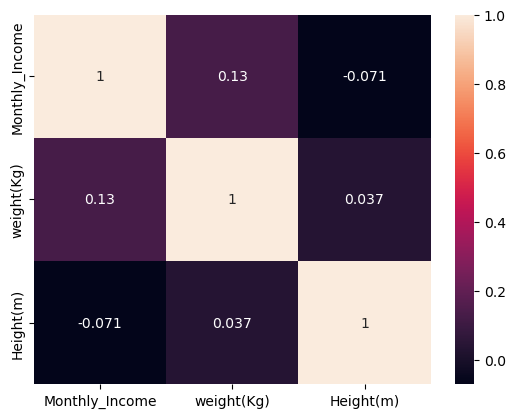

In [55]:
#Using the heatmap to check for correlation of the columns
sns.heatmap(heatm,annot=True)
plt.show()

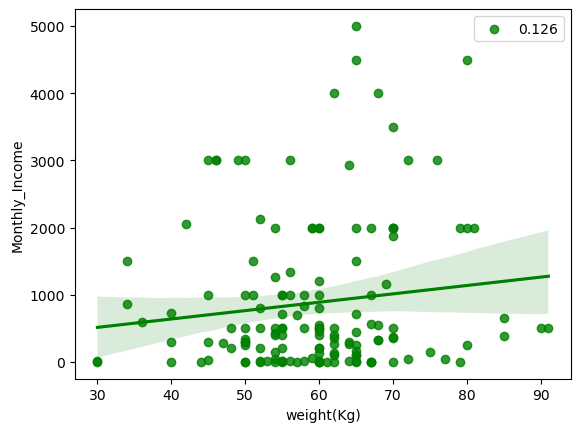

In [56]:
#Checking the correlation between the weight(Kg) and Monthly_Income
correlation = Ndata["weight(Kg)"].corr(Ndata["Monthly_Income"]).round(3)
sns.regplot(x=Ndata["weight(Kg)"],y=Ndata["Monthly_Income"],color="g",label=correlation)
plt.legend()
plt.show()


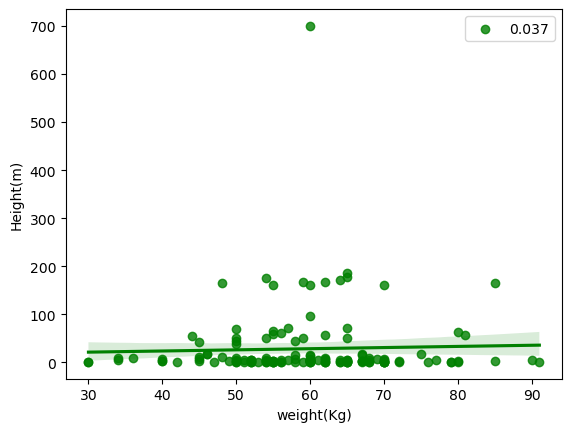

In [57]:
#Checking the correlation between the weight(Kg) and Monthly_Income
correlation = Ndata["weight(Kg)"].corr(Ndata["Height(m)"]).round(3)
sns.regplot(x=Ndata["weight(Kg)"],y=Ndata["Height(m)"],color="g",label=correlation)
plt.legend()
plt.show()


In [58]:
#Cehcking whether the height column is cleaned

In [59]:
Ndata["Height(m)"].isnull().sum()
   

0

In [60]:
Ndata["Height(m)"].max()

700.0

In [61]:
Ndata["Height(m)"].min()

1.0

In [62]:
Ndata.head(1)

,Timestamp,Region,Age_Range,Gender,Education_Level,Monthly_Income,weight(Kg),Height(m),Rainy_Season,Dry_Season,Body_Exercise,Diseases
Timestamp,,,,,,,,,,,,
12/15/2024 18:28:04,12/15/2024 18:28:04,Ashanti Region,20-25,Male,Tertiary,560.0,67.0,2.0,Carbohydrates,Protein,Yes,Anemia


In [63]:
Ndata["Height(m)"].interpolate(method="ffill",inplace=True)

In [64]:
#Converting the parts that are more than normal height
# for height in Ndata["Height(m)"]:
#     if (height > 2.5 ):
#         height = (height/(height/1.6))
#     elif (height > 100 ):
#        height= (height/(height/1.7))
        
#     else:
#         height = height
#     Ndata["Height(m)"] = height  
# Ndata["Height(m)"].min()     

<Axes: ylabel='Height(m)'>

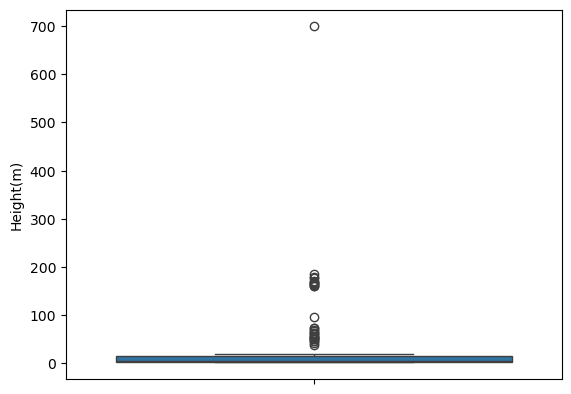

In [65]:
sns.boxplot(Ndata["Height(m)"])

<Axes: ylabel='Density'>

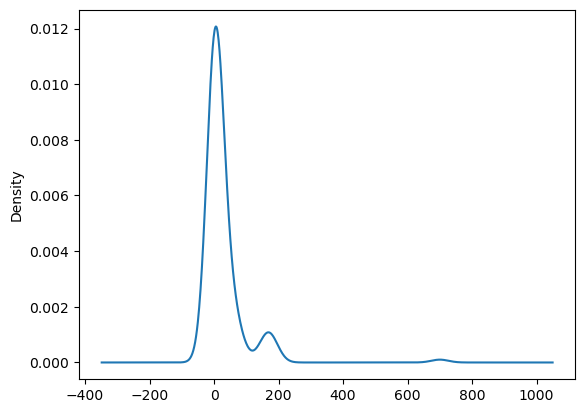

In [66]:
Ndata["Height(m)"].plot(kind="kde")

In [67]:
Ndata.tail()

,Timestamp,Region,Age_Range,Gender,Education_Level,Monthly_Income,weight(Kg),Height(m),Rainy_Season,Dry_Season,Body_Exercise,Diseases
Timestamp,,,,,,,,,,,,
12/22/2024 18:26:06,12/22/2024 18:26:06,Ashanti Region,15-20,Female,High School,140.0,62.0,5.4,Protein,Vitamin,Yes,Obesity
12/23/2024 7:52:43,12/23/2024 7:52:43,Upper east Region,20-25,Male,Tertiary,20.0,64.0,171.0,Carbohydrates,Vitamin,Yes,Anemia
12/23/2024 18:36:05,12/23/2024 18:36:05,Northen Region,15-20,Male,Tertiary,20.0,55.0,162.0,Protein,Carbohydrates,Yes,NaN
12/25/2024 8:33:56,12/25/2024 8:33:56,Bono East Region,15-20,Female,Tertiary,20.0,58.0,1.6,Carbohydrates,Carbohydrates,No,Non
12/26/2024 5:36:07,12/26/2024 5:36:07,Greater Accra Region,20-25,Male,High School,20.0,56.0,1.7,Carbohydrates,Carbohydrates,Yes,NaN


In [68]:
#Changing the portion of the Height greater than 2.67 to 1.6
import random as rnd
Array = np.arange(1.7,2.2)
randArray = (Array[0])
Ndata.loc[(Ndata["Height(m)"] > 2.1),"Height(m)"] = randArray

In [69]:
#Changing the portion of the Height less than 1.2 to 1.6
import random as rnd
Array = np.arange(1.4,2.2)
randArray = (Array[0])
Ndata.loc[(Ndata["Height(m)"] < 1.4) ,"Height(m)"] = randArray

In [70]:
Ndata["Height(m)"].head()

Timestamp
12/15/2024 18:28:04    2.0
12/15/2024 18:45:00    1.4
12/15/2024 19:40:47    1.7
12/15/2024 19:53:18    1.9
12/15/2024 20:02:32    1.7
Name: Height(m), dtype: float64

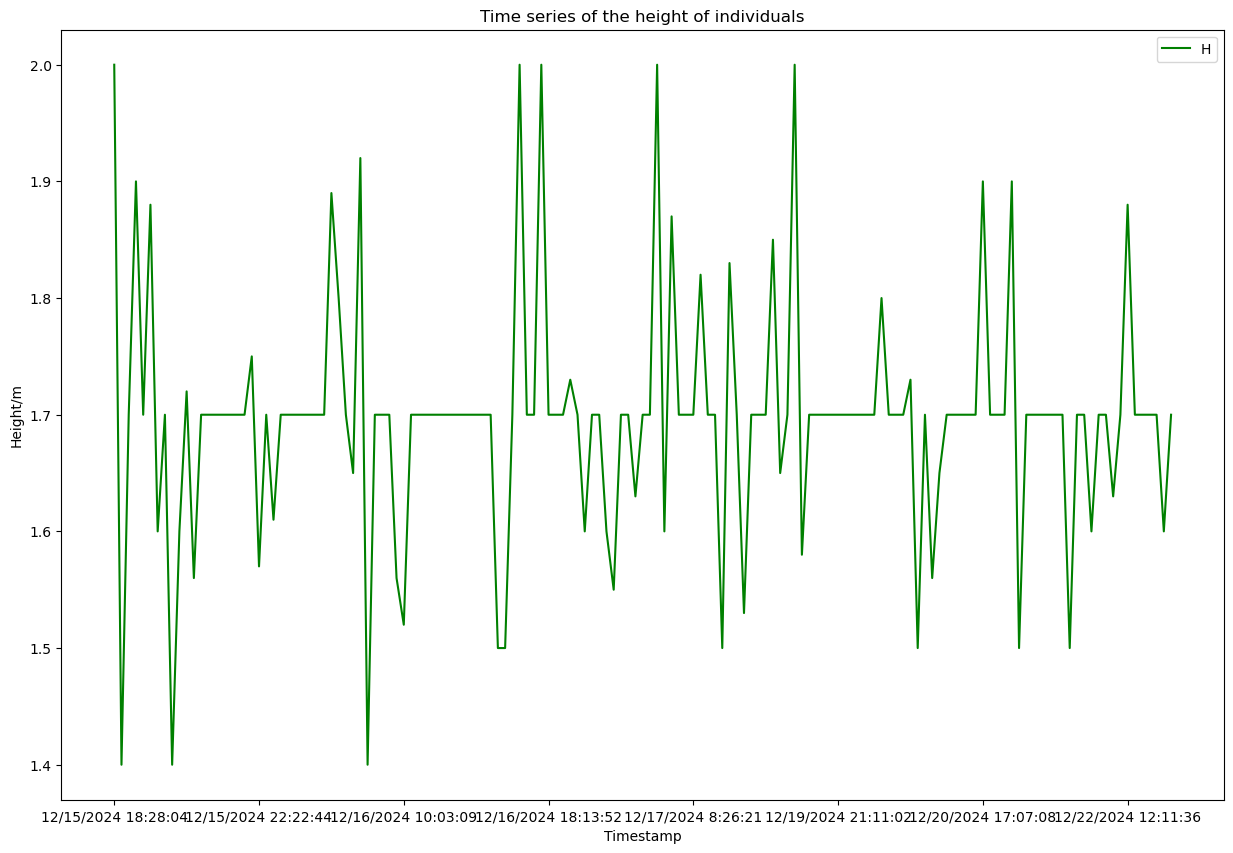

In [71]:
#Plot a time series to check the values of the height in meters
plt.figure(figsize=(15,10))
Ndata["Height(m)"].plot(label="H",color="g")
plt.legend()
plt.title("Time series of the height of individuals")
plt.ylabel("Height/m")
plt.show()

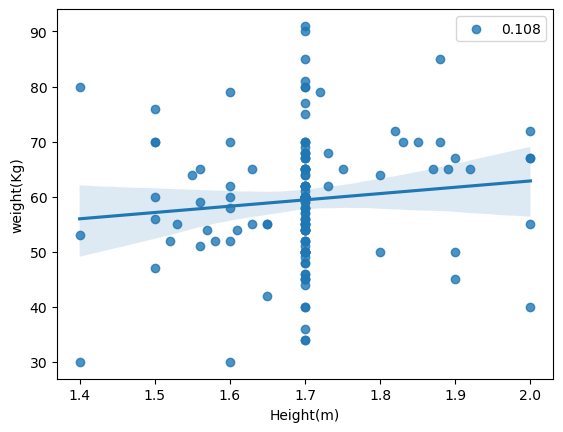

In [72]:
hw = Ndata["Height(m)"].corr(Ndata["weight(Kg)"]).round(3)
sns.regplot(x=Ndata["Height(m)"], y=Ndata["weight(Kg)"],label=hw)
plt.legend()
plt.show()

In [73]:
num = Ndata.select_dtypes(include="number").corr()

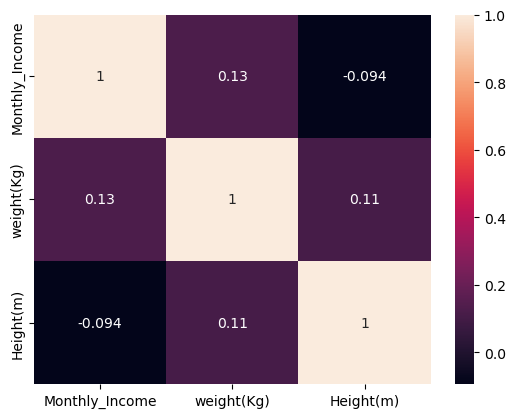

In [74]:
sns.heatmap(num,annot=True)
plt.show()

In [75]:
Ndata.head()

,Timestamp,Region,Age_Range,Gender,Education_Level,Monthly_Income,weight(Kg),Height(m),Rainy_Season,Dry_Season,Body_Exercise,Diseases
Timestamp,,,,,,,,,,,,
12/15/2024 18:28:04,12/15/2024 18:28:04,Ashanti Region,20-25,Male,Tertiary,560.00,67.0,2.0,Carbohydrates,Protein,Yes,Anemia
12/15/2024 18:45:00,12/15/2024 18:45:00,Bono East Region,20-25,Male,Tertiary,2000.00,80.0,1.4,Carbohydrates,Carbohydrates,Yes,Obesity
12/15/2024 19:40:47,12/15/2024 19:40:47,Upper east Region,20-25,Male,Tertiary,1333.33,56.0,1.7,Carbohydrates,Vitamin,NaN,Kwashiorkor
12/15/2024 19:53:18,12/15/2024 19:53:18,Upper east Region,20-25,Male,Tertiary,1000.00,67.0,1.9,Carbohydrates,Protein,Yes,None of these
12/15/2024 20:02:32,12/15/2024 20:02:32,Ahafo Region,20-25,Male,Tertiary,700.00,57.0,1.7,Carbohydrates,Protein,Yes,Obesity


In [76]:
Ndata.shape

(147, 12)

In [77]:
#Cleaning the  Body_Exercise portion

In [78]:
Ndata.Body_Exercise.nunique()

2

In [79]:
#Filling the NaN values using the back fill function

Ndata.Body_Exercise.bfill(inplace=True)

In [80]:
Ndata.Body_Exercise.isnull().sum()

0

In [81]:
#Cleaning the seasonal Data


In [82]:
#RAINY SEASON
Ndata.groupby(Ndata["Rainy_Season"])["Rainy_Season"].value_counts()


Rainy_Season
Carbohydrates    91
Fats              2
Fiber             4
Minerals          2
Protein          34
Vitamin          14
Name: count, dtype: int64

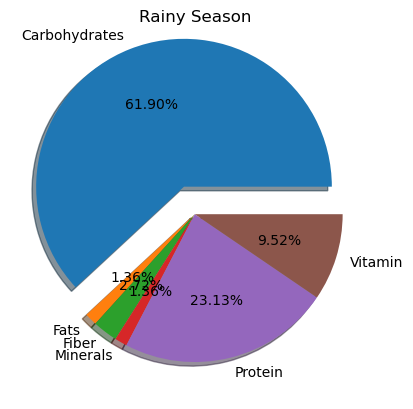

In [83]:
#Plot a piechart for the nutrients in the rainy season
rainy = Ndata.groupby(Ndata["Rainy_Season"])["Rainy_Season"].value_counts()
label=['Carbohydrates' ,'Fats' ,'Fiber' ,'Minerals','Protein' ,'Vitamin']

plt.pie(rainy,autopct='%0.2f%%',labels=label,radius=1,shadow=True,explode=[0.2,0,0,0,0,0])
plt.title("Rainy Season")
plt.show()

In [84]:
#DRY SEASON
Ndata.groupby(Ndata["Dry_Season"])["Dry_Season"].value_counts()

Dry_Season
Carbohydrates    92
Fats              2
Fiber             2
Minerals          5
Protein          39
Vitamin           7
Name: count, dtype: int64

In [85]:
Ndata.head(1)

,Timestamp,Region,Age_Range,Gender,Education_Level,Monthly_Income,weight(Kg),Height(m),Rainy_Season,Dry_Season,Body_Exercise,Diseases
Timestamp,,,,,,,,,,,,
12/15/2024 18:28:04,12/15/2024 18:28:04,Ashanti Region,20-25,Male,Tertiary,560.0,67.0,2.0,Carbohydrates,Protein,Yes,Anemia


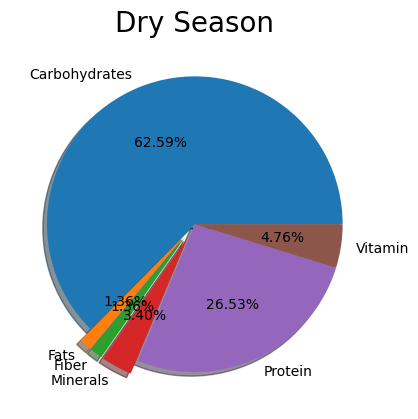

In [86]:
#Plot a piechart for the nutrients in the dry season
dry = Ndata.groupby(Ndata["Dry_Season"])["Dry_Season"].value_counts()
label=['Carbohydrates' ,'Fats' ,'Fiber' ,'Minerals','Protein' ,'Vitamin']
plt.pie(dry,autopct='%0.2f%%',labels=label,radius=1,shadow=True,explode=[0,0.1,0.1,0.1,0,0])
plt.title("Dry Season",fontsize=20)
plt.show()

In [87]:
Ndata.head()

,Timestamp,Region,Age_Range,Gender,Education_Level,Monthly_Income,weight(Kg),Height(m),Rainy_Season,Dry_Season,Body_Exercise,Diseases
Timestamp,,,,,,,,,,,,
12/15/2024 18:28:04,12/15/2024 18:28:04,Ashanti Region,20-25,Male,Tertiary,560.00,67.0,2.0,Carbohydrates,Protein,Yes,Anemia
12/15/2024 18:45:00,12/15/2024 18:45:00,Bono East Region,20-25,Male,Tertiary,2000.00,80.0,1.4,Carbohydrates,Carbohydrates,Yes,Obesity
12/15/2024 19:40:47,12/15/2024 19:40:47,Upper east Region,20-25,Male,Tertiary,1333.33,56.0,1.7,Carbohydrates,Vitamin,Yes,Kwashiorkor
12/15/2024 19:53:18,12/15/2024 19:53:18,Upper east Region,20-25,Male,Tertiary,1000.00,67.0,1.9,Carbohydrates,Protein,Yes,None of these
12/15/2024 20:02:32,12/15/2024 20:02:32,Ahafo Region,20-25,Male,Tertiary,700.00,57.0,1.7,Carbohydrates,Protein,Yes,Obesity


In [88]:
#Cleaning the educational level of the data
Ndata.Education_Level.nunique()

3

In [89]:
#Fill the NaN value using the ffill method
Ndata.Education_Level.isnull().sum()

1

In [90]:
#Using the interpolate() method for filling the missing value
Ndata.Education_Level = Ndata.Education_Level.ffill()

In [91]:
Ndata.Education_Level.isnull().sum()

0

In [92]:
#Checking for null values in body exercise
Ndata.Body_Exercise.isnull().sum()

0

In [93]:
#Cleaning the Disease part
Ndata.Diseases.isnull().sum()

24

In [94]:
#Inplacing the NaN values part to be none
Ndata.Diseases = Ndata.Diseases.fillna("None")

In [95]:
Ndata.Diseases.isnull().sum()

0

In [96]:
#Replacing those who do not have disease with None using the .loc method
Ndata.loc[(Ndata["Diseases"].str.contains("Non")),"Diseases"] = "None"
Ndata.loc[(Ndata["Diseases"].str.contains("non")),"Diseases"] = "None"
Ndata.loc[(Ndata["Diseases"].str.contains("Don")),"Diseases"] = "None"
Ndata.loc[(Ndata["Diseases"].str.contains("money")),"Diseases"] = "None"
Ndata.loc[(Ndata["Diseases"].str.contains("No")),"Diseases"] = "None"
Ndata.loc[(Ndata["Diseases"].str.contains("no")),"Diseases"] = "None"

In [97]:
Ndata[100:110]

,Timestamp,Region,Age_Range,Gender,Education_Level,Monthly_Income,weight(Kg),Height(m),Rainy_Season,Dry_Season,Body_Exercise,Diseases
Timestamp,,,,,,,,,,,,
12/19/2024 21:11:02,12/19/2024 21:11:02,Upper east Region,20-25,Female,Tertiary,100.00,65.0,1.7,Carbohydrates,Protein,No,None
12/19/2024 21:33:28,12/19/2024 21:33:28,Ashanti Region,15-20,Female,Tertiary,400.00,55.0,1.7,Protein,Carbohydrates,No,Scurvy
12/19/2024 21:43:31,12/19/2024 21:43:31,North East Region,15-20,Female,Tertiary,200.00,60.0,1.7,Vitamin,Protein,No,Anemia
12/20/2024 0:35:50,12/20/2024 0:35:50,Ashanti Region,15-20,Male,Tertiary,0.00,70.0,1.7,Carbohydrates,Protein,Yes,None
12/20/2024 4:20:57,12/20/2024 4:20:57,Ashanti Region,20-25,Male,High School,1.00,50.0,1.7,Carbohydrates,Carbohydrates,Yes,None
12/20/2024 5:57:18,12/20/2024 5:57:18,Ashanti Region,20-25,Female,Tertiary,167.33,65.0,1.7,Carbohydrates,Carbohydrates,No,None
12/20/2024 6:15:51,12/20/2024 6:15:51,Northen Region,20-25,Male,Tertiary,333.67,50.0,1.8,Carbohydrates,Carbohydrates,Yes,Weight loss
12/20/2024 6:33:39,12/20/2024 6:33:39,Upper West Region,25-30,Male,Tertiary,500.00,60.0,1.7,Carbohydrates,Carbohydrates,No,None
12/20/2024 9:09:14,12/20/2024 9:09:14,Ashanti Region,20-25,Male,High School,1166.67,69.0,1.7,Minerals,Protein,No,Obesity


In [98]:
#Checking the whole data whether there is null
Ndata.dropna(inplace=True)
Ndata.isnull().sum()


Timestamp          0
Region             0
Age_Range          0
Gender             0
Education_Level    0
Monthly_Income     0
weight(Kg)         0
Height(m)          0
Rainy_Season       0
Dry_Season         0
Body_Exercise      0
Diseases           0
dtype: int64

In [99]:
Ndata.shape

(147, 12)

In [100]:
Ndata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 12/15/2024 18:28:04 to 12/26/2024 5:36:07
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        147 non-null    object 
 1   Region           147 non-null    object 
 2   Age_Range        147 non-null    object 
 3   Gender           147 non-null    object 
 4   Education_Level  147 non-null    object 
 5   Monthly_Income   147 non-null    float64
 6   weight(Kg)       147 non-null    float64
 7   Height(m)        147 non-null    float64
 8   Rainy_Season     147 non-null    object 
 9   Dry_Season       147 non-null    object 
 10  Body_Exercise    147 non-null    object 
 11  Diseases         147 non-null    object 
dtypes: float64(3), object(9)
memory usage: 19.0+ KB


In [101]:
for col in ['Region','Age_Range','Gender','Education_Level','Monthly_Income','weight(Kg)','Height(m)','Rainy_Season','Dry_Season','Body_Exercise','Diseases']:
    print('-------------------------------------------------------------------')
    print(Ndata[col])

-------------------------------------------------------------------
Timestamp
12/15/2024 18:28:04          Ashanti Region
12/15/2024 18:45:00        Bono East Region
12/15/2024 19:40:47       Upper east Region
12/15/2024 19:53:18       Upper east Region
12/15/2024 20:02:32            Ahafo Region
                               ...         
12/22/2024 18:26:06          Ashanti Region
12/23/2024 7:52:43        Upper east Region
12/23/2024 18:36:05          Northen Region
12/25/2024 8:33:56         Bono East Region
12/26/2024 5:36:07     Greater Accra Region
Name: Region, Length: 147, dtype: object
-------------------------------------------------------------------
Timestamp
12/15/2024 18:28:04    20-25
12/15/2024 18:45:00    20-25
12/15/2024 19:40:47    20-25
12/15/2024 19:53:18    20-25
12/15/2024 20:02:32    20-25
                       ...  
12/22/2024 18:26:06    15-20
12/23/2024 7:52:43     20-25
12/23/2024 18:36:05    15-20
12/25/2024 8:33:56     15-20
12/26/2024 5:36:07     20-25


In [102]:
#Add a BMI column to it
Ndata["BMI"] = (Ndata["weight(Kg)"]/(Ndata["Height(m)"])**2).round(3)

In [103]:
#Saving the clean data into a separate file name for visualization
Ndata.to_csv("rubabatu_nutrition.csv")

In [104]:
#Reading the data
rubyfath = pd.read_csv("rubabatu_nutrition.csv")

In [105]:
rubyfath.head(2)

,Timestamp,Timestamp.1,Region,Age_Range,Gender,Education_Level,Monthly_Income,weight(Kg),Height(m),Rainy_Season,Dry_Season,Body_Exercise,Diseases,BMI
0,12/15/2024 18:28:04,12/15/2024 18:28:04,Ashanti Region,20-25,Male,Tertiary,560.0,67.0,2.0,Carbohydrates,Protein,Yes,Anemia,16.750
1,12/15/2024 18:45:00,12/15/2024 18:45:00,Bono East Region,20-25,Male,Tertiary,2000.0,80.0,1.4,Carbohydrates,Carbohydrates,Yes,Obesity,40.816


In [106]:
#Checking for the things to compare in my dataset

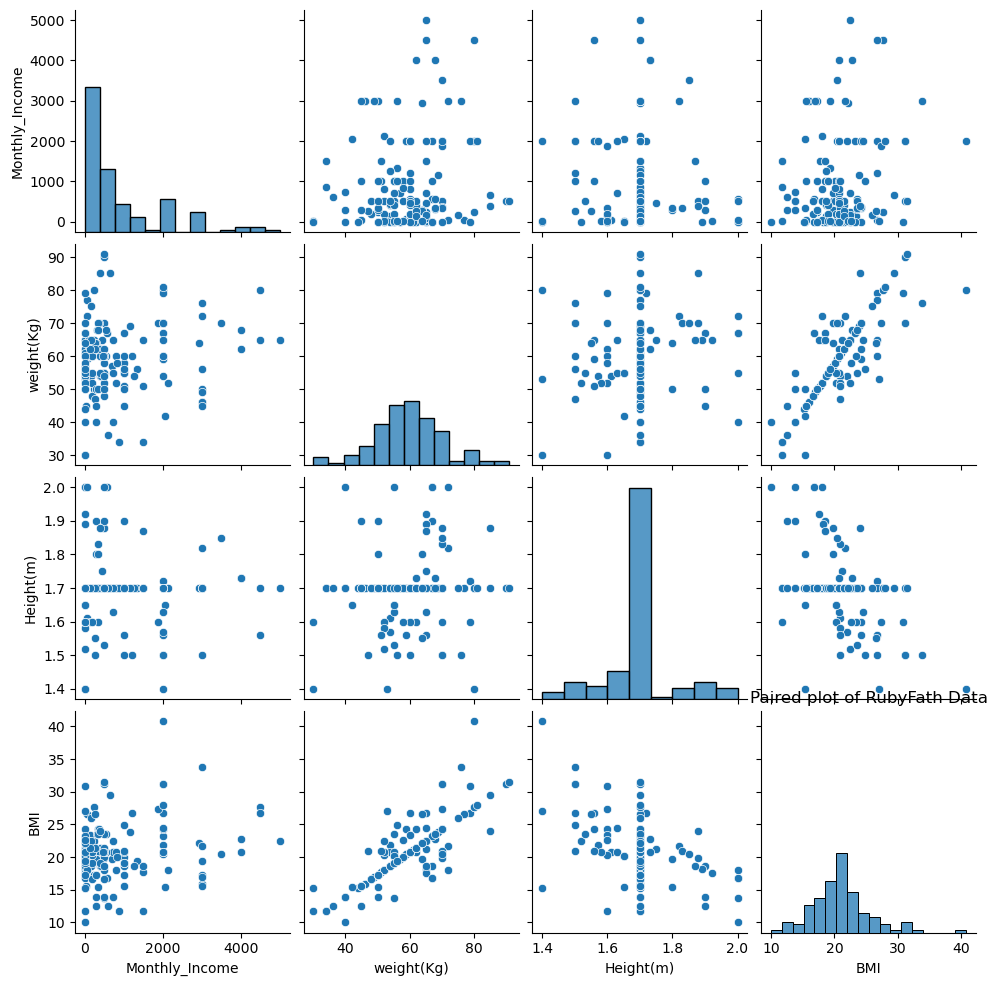

In [107]:
# Using the pair plot to check the summary of the number of paired columns variation
sns.pairplot(rubyfath)

plt.title("Paired plot of RubyFath Data")
plt.show()

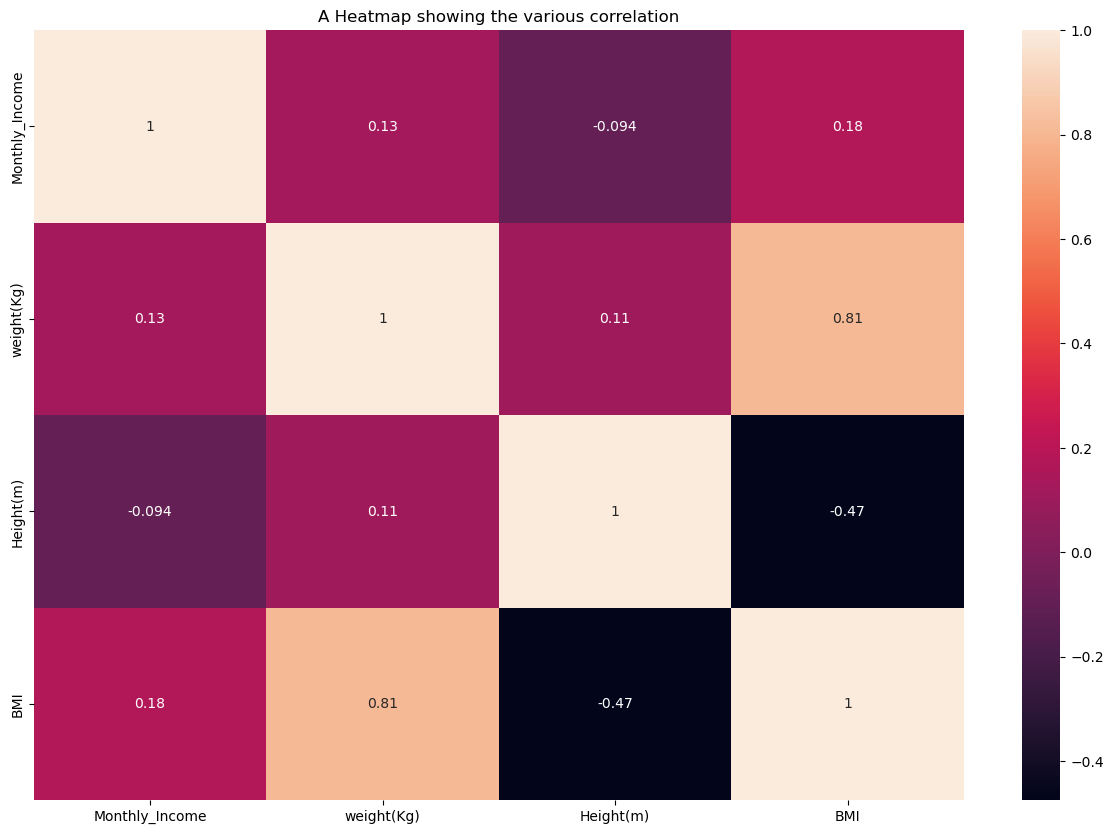

In [108]:
#Plot a heatmap to check for their correlation
total_heatmap = rubyfath.select_dtypes(include="number").corr()

#plot heatmap
plt.figure(figsize=(15,10))
sns.heatmap(total_heatmap,annot=True)
plt.title("A Heatmap showing the various correlation")
plt.show()

In [109]:
#Scatter or regplot for the various columns

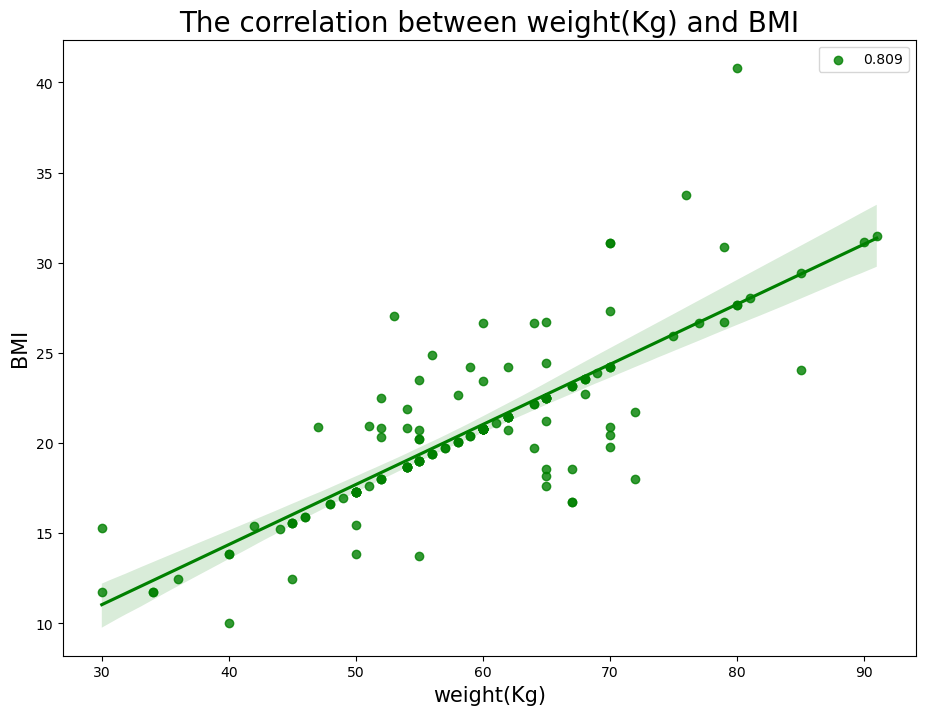

In [110]:
#rubyfath.BMI.corr(rubyfath["weight(Kg)"])
corr_wm = rubyfath.BMI.corr(rubyfath["weight(Kg)"]).round(3)
plt.figure(figsize=(11,8))
sns.regplot(x=rubyfath["weight(Kg)"],y=rubyfath.BMI,label=corr_wm,color="g")
plt.legend()
plt.title("The correlation between weight(Kg) and BMI",fontsize=20)
plt.xlabel("weight(Kg)",fontsize=15)
plt.ylabel("BMI",fontsize=15)
plt.show()

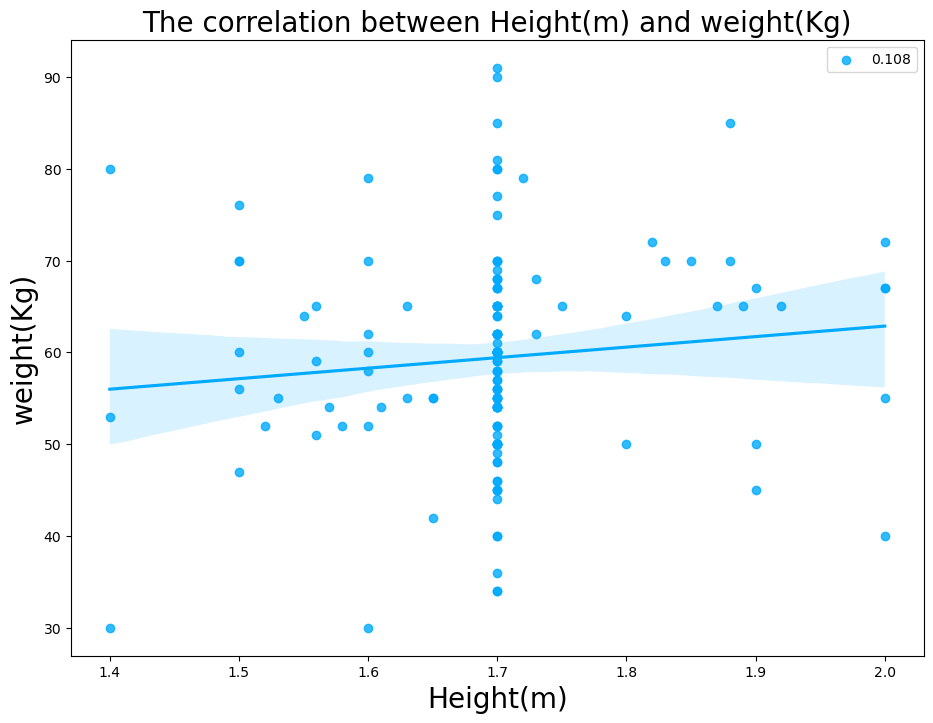

In [111]:
#rubyfath.weight(Kg).corr(rubyfath["Height(m)"])
corr_wm = rubyfath["weight(Kg)"].corr(rubyfath["Height(m)"]).round(3)
plt.figure(figsize=(11,8))
sns.regplot(x=rubyfath["Height(m)"],y=rubyfath["weight(Kg)"],label=corr_wm,color="#00aaFF")
plt.legend()
plt.title("The correlation between Height(m) and weight(Kg)",fontsize=20)
plt.xlabel("Height(m)",fontsize=20)
plt.ylabel("weight(Kg)",fontsize=20)
plt.show()

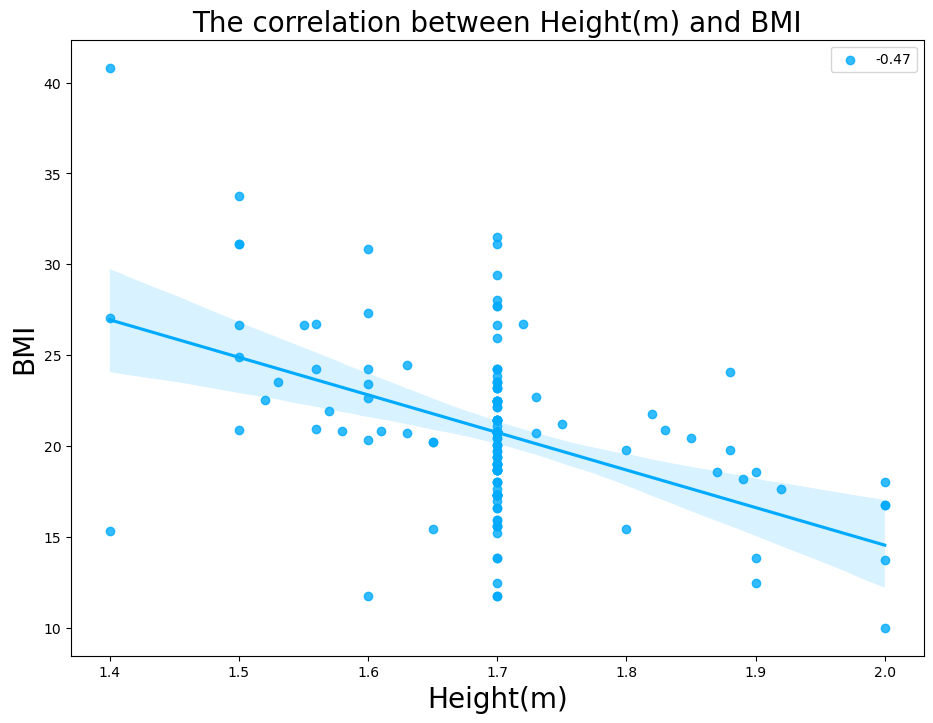

In [112]:
#rubyfath.BMI.corr(rubyfath["Height(m)"])
corr_wm = rubyfath.BMI.corr(rubyfath["Height(m)"]).round(2)
plt.figure(figsize=(11,8))
sns.regplot(x=rubyfath["Height(m)"],y=rubyfath.BMI,label=corr_wm,color="#00aaFF")
plt.legend()
plt.title("The correlation between Height(m) and BMI",fontsize=20)
plt.xlabel("Height(m)",fontsize=20)
plt.ylabel("BMI",fontsize=20)
plt.show()

In [113]:
#ploting histogram for the various

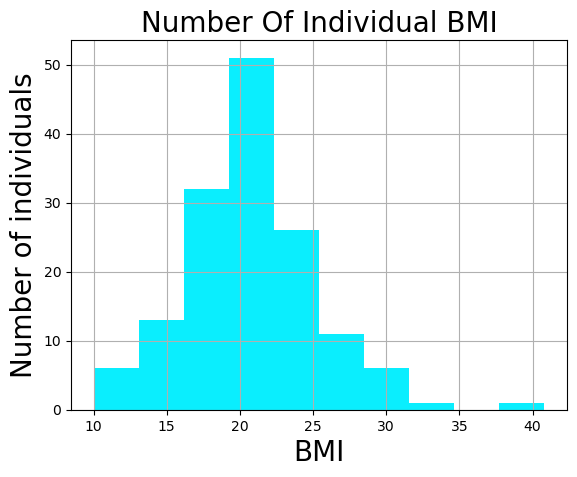

In [114]:
#Histogram showing the variations of the rubyfath.BMI
plt.grid()

plt.hist(rubyfath.BMI,color="#0AEEfe")
plt.title("Number Of Individual BMI",fontsize=20)
plt.xlabel("BMI",fontsize=20)
plt.ylabel("Number of individuals",fontsize=20)
plt.show()

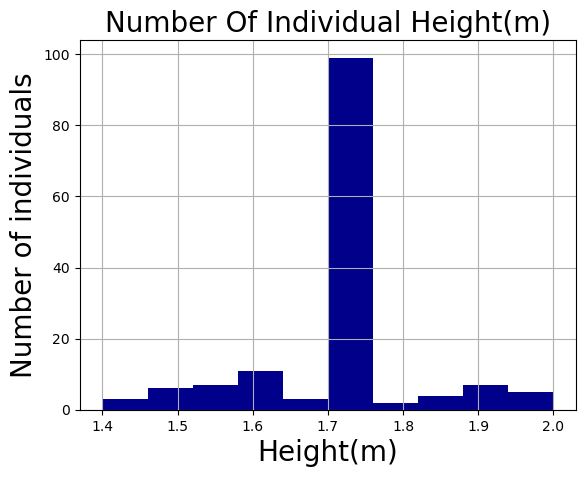

In [115]:
#Histogram showing the variations of the 
plt.grid()

plt.hist(rubyfath["Height(m)"],color="darkblue")
plt.title("Number Of Individual Height(m)",fontsize=20)
plt.xlabel("Height(m)",fontsize=20)
plt.ylabel("Number of individuals",fontsize=20)
plt.show()

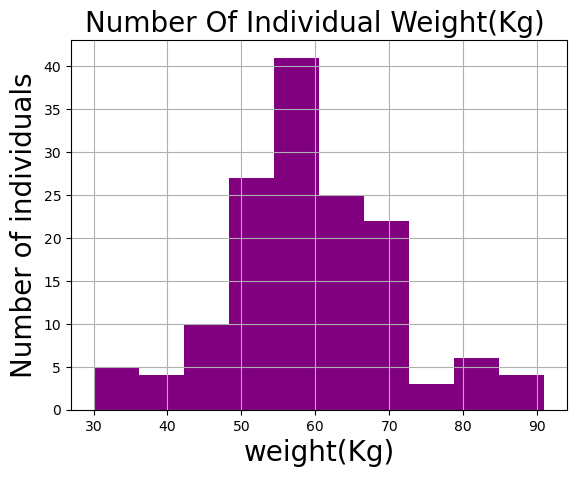

In [116]:
#Histogram showing the number of individuals with a particular weight(Kg)
plt.grid()

plt.hist(rubyfath["weight(Kg)"],color="purple")
plt.title("Number Of Individual Weight(Kg) ",fontsize=20)
plt.xlabel("weight(Kg)",fontsize=20)
plt.ylabel("Number of individuals",fontsize=20)
plt.show()

In [117]:
#using a pie plot for different kinds of disease
rubyfath.Diseases = rubyfath.Diseases.str.strip()
rubyfath.Diseases = rubyfath.Diseases.str.lower()

In [118]:
#Getting parts of the data and assingning them to a pariticular data
#Ulcer
rubyfath.loc[(rubyfath["Diseases"] == "stomach ache"),"Diseases"] = "ulcer"
rubyfath.loc[(rubyfath["Diseases"] == "stomach pain ( ulcer)"),"Diseases"] = "ulcer"
rubyfath.loc[(rubyfath["Diseases"] == "stomach ulcer"),"Diseases"] = "ulcer"
rubyfath.loc[(rubyfath["Diseases"] == "ulcer"),"Diseases"] = "ulcer"
rubyfath.loc[(rubyfath["Diseases"] == "peptic ulcer"),"Diseases"] = "ulcer"

#diabetes 
rubyfath.loc[(rubyfath["Diseases"] == "diabetes"),"Diseases"] = "diabetes"
rubyfath.loc[(rubyfath["Diseases"] == "diabeties"),"Diseases"] = "diabetes"

#headache
rubyfath.loc[(rubyfath["Diseases"] == "cold and headache"),"Diseases"] = "headache"

#weight loss

rubyfath.loc[(rubyfath["Diseases"] == "body weakness"),"Diseases"] = "weight loss"

In [119]:
disease = rubyfath.groupby("Diseases")["Diseases"].value_counts()
disease

Diseases
anemia             21
asthma              3
beriberi            6
constipation        1
diabetes            7
headache            2
hypertension        3
kwashiorkor         4
malaria            13
marasmus            1
muscle cramps       1
night blindness     1
obesity            19
rickets             1
scurvy             14
ulcer               5
weight loss         2
Name: count, dtype: int64

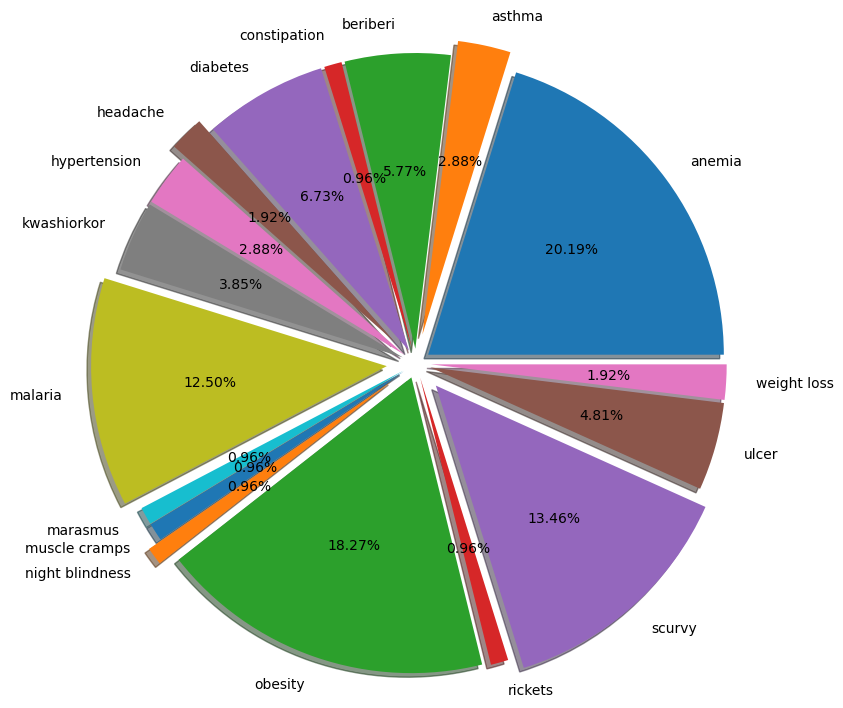

In [120]:
label=["anemia","asthma","beriberi","constipation","diabetes","headache","hypertension","kwashiorkor","malaria","marasmus","muscle cramps","night blindness","obesity","rickets","scurvy","ulcer","weight loss"]         
plt.pie(disease,autopct='%0.2f%%',labels=label,radius=2,shadow=True,explode=[0.1,0.2,0.1,0.1,0.1,0.2,0.1,0.1,0.2,0.1,0.1,0.2,0.1,0.1,0.2,0.1,0.1])
plt.show()

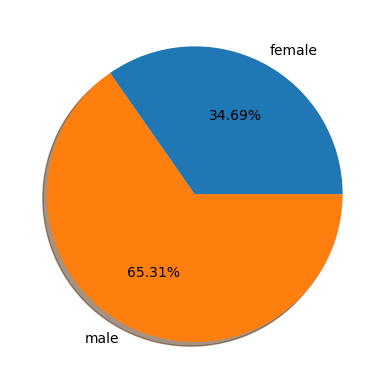

In [121]:
#Determing the number of male and females that file the form
gender = rubyfath.groupby("Gender")["Gender"].value_counts()
plt.pie(gender,autopct='%0.2f%%',radius=1,shadow=True,labels=["female","male"])
plt.show()


In [122]:
#Ploting the time series

<Figure size 2000x1000 with 0 Axes>

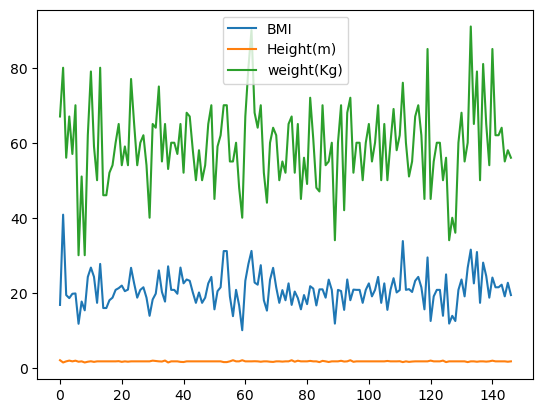

In [123]:
plt.figure(figsize=(20,10))
rubyfath[["BMI","Height(m)","weight(Kg)"]].plot()
plt.show()

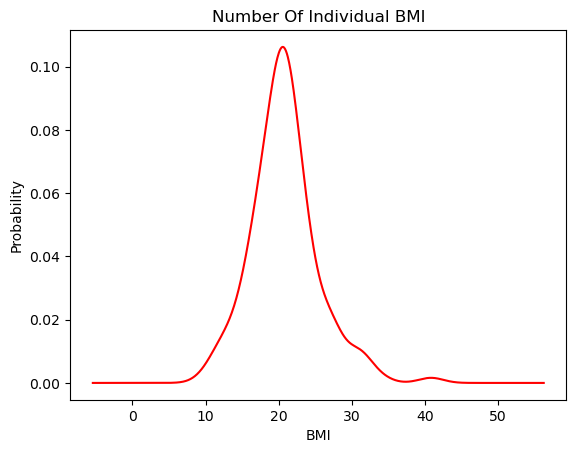

In [124]:
#Density plot
rubyfath.BMI.plot(kind="kde",color="r")
plt.title("Number Of Individual BMI")
plt.xlabel("BMI")
plt.ylabel("Probability")
plt.show()

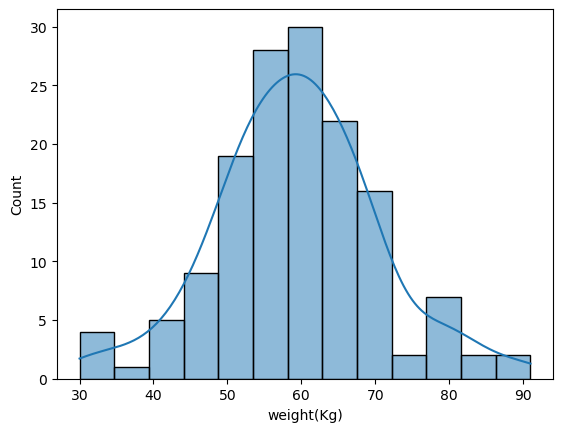

In [125]:
sns.histplot(rubyfath["weight(Kg)"],kde=True)
plt.show()

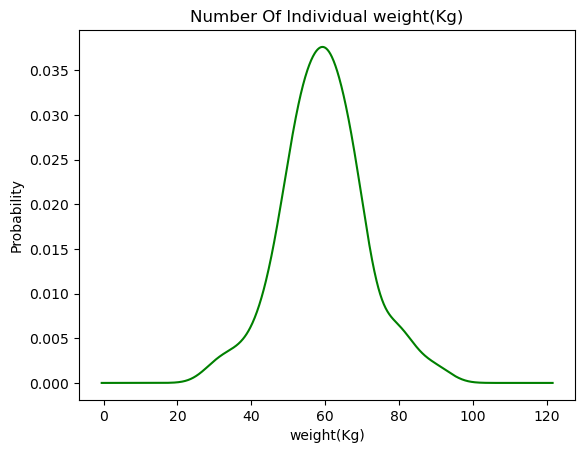

In [126]:
rubyfath["weight(Kg)"].plot(kind="kde",color="g")
plt.title("Number Of Individual weight(Kg)")
plt.xlabel("weight(Kg)")
plt.ylabel("Probability")
plt.show()

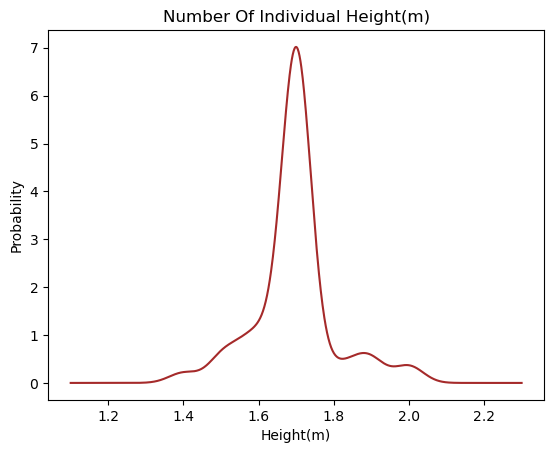

In [127]:
rubyfath["Height(m)"].plot(kind="kde",color="brown")
plt.title("Number Of Individual Height(m)")
plt.xlabel("Height(m)")
plt.ylabel("Probability")
plt.show()

In [128]:
rubyfath.stack()

0    Timestamp        12/15/2024 18:28:04
     Timestamp.1      12/15/2024 18:28:04
     Region                Ashanti Region
     Age_Range                      20-25
     Gender                          Male
                             ...         
146  Height(m)                        1.7
     Rainy_Season           Carbohydrates
     Dry_Season             Carbohydrates
     Body_Exercise                    Yes
     BMI                           19.377
Length: 2015, dtype: object

In [129]:
pd.crosstab(rubyfath.Age_Range,rubyfath.Diseases,margins=True)

Diseases,anemia,asthma,beriberi,constipation,diabetes,headache,hypertension,kwashiorkor,malaria,marasmus,muscle cramps,night blindness,obesity,rickets,scurvy,ulcer,weight loss,All
Age_Range,,,,,,,,,,,,,,,,,,
10-15,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
15-20,7,2,1,1,3,0,2,1,3,0,0,0,5,0,4,3,1,33
20-25,8,1,3,0,2,1,0,2,8,1,1,1,12,1,8,1,1,51
25-30,4,0,2,0,1,0,1,0,2,0,0,0,2,0,2,0,0,14
30-35,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,4
35-40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
All,21,3,6,1,7,2,3,4,13,1,1,1,19,1,14,5,2,104


In [130]:
pd.melt(rubyfath,id_vars='Age_Range',value_vars='Gender').head()

,Age_Range,variable,value
0,20-25,Gender,Male
1,20-25,Gender,Male
2,20-25,Gender,Male
3,20-25,Gender,Male
4,20-25,Gender,Male


In [131]:
# Ploting a relational plot with the "BMI","" and "weight(Kg)" column as the hue="Diseases" using seaborn library

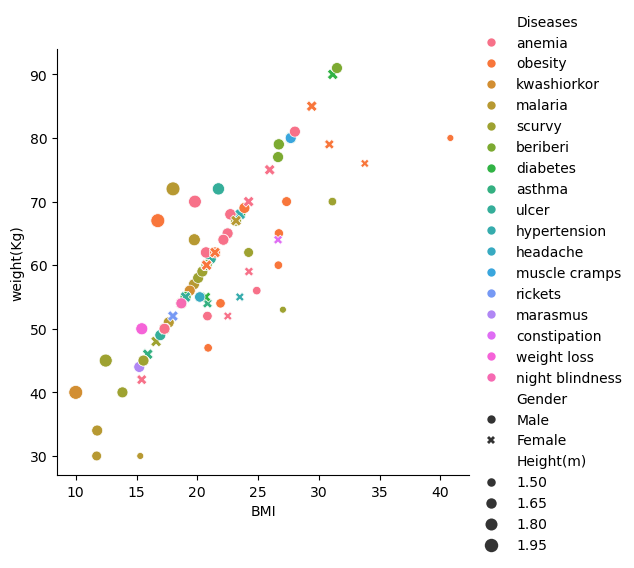

In [132]:
# With this visualisation I will be able to identify the various disease with respect to the regions and the height of the individuals
sns.relplot(data=rubyfath,x="BMI",y="weight(Kg)",hue="Diseases",style="Gender",size="Height(m)",sizes=(25,100))
plt.show()

In [133]:

# rubyfath.groupby("Diseases")["Gender"].value_counts()
# rubyfath["year"] = pd.date_range(start="2024",periods=150,freq="B")

In [134]:
# plt.figure(figsize=(25,20))
# sns.relplot(data=rubyfath,x="Weight(Kg)",kind="line",y="BMI",style="Gender",hue="Gender",markers="+D")
# plt.show();

<Axes: >

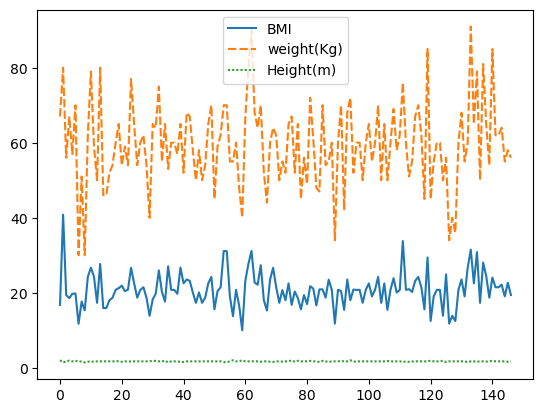

In [135]:
sns.lineplot(rubyfath[["BMI","weight(Kg)","Height(m)"]])

|----------------THE CORRELATIONS OF THE VARIOUS VARIABLES----------------|
                Monthly_Income  weight(Kg)  Height(m)    BMI
Monthly_Income           1.000       0.126     -0.094  0.176
weight(Kg)               0.126       1.000      0.108  0.809
Height(m)               -0.094       0.108      1.000 -0.475
BMI                      0.176       0.809     -0.475  1.000
|----------------THE RELATIONSHIPS OF THE VARIOUS VARIABLES---------------|


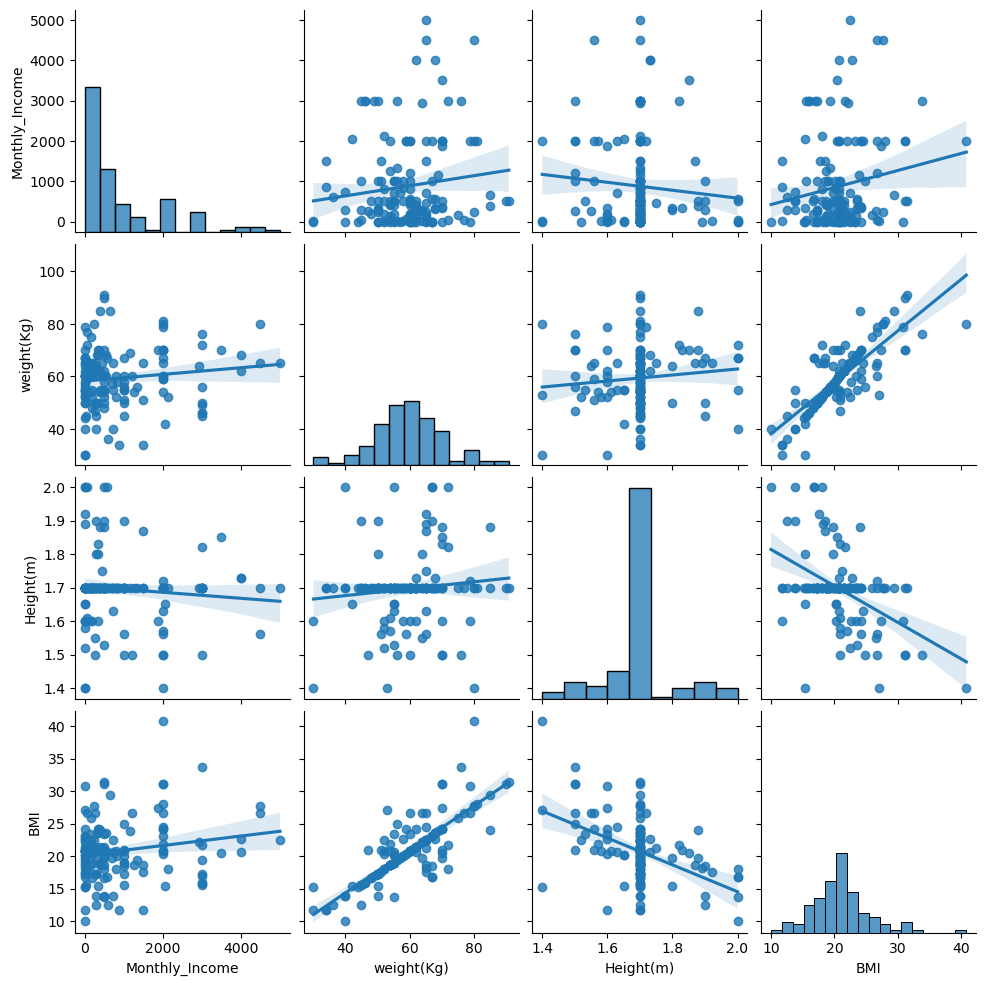

In [136]:
m = rubyfath.select_dtypes(include="number").corr().round(3)
print("|----------------THE CORRELATIONS OF THE VARIOUS VARIABLES----------------|")
print(m)
print("|----------------THE RELATIONSHIPS OF THE VARIOUS VARIABLES---------------|")

sns.pairplot(rubyfath,kind="reg")
plt.savefig("scatter_.jpg")
plt.show()


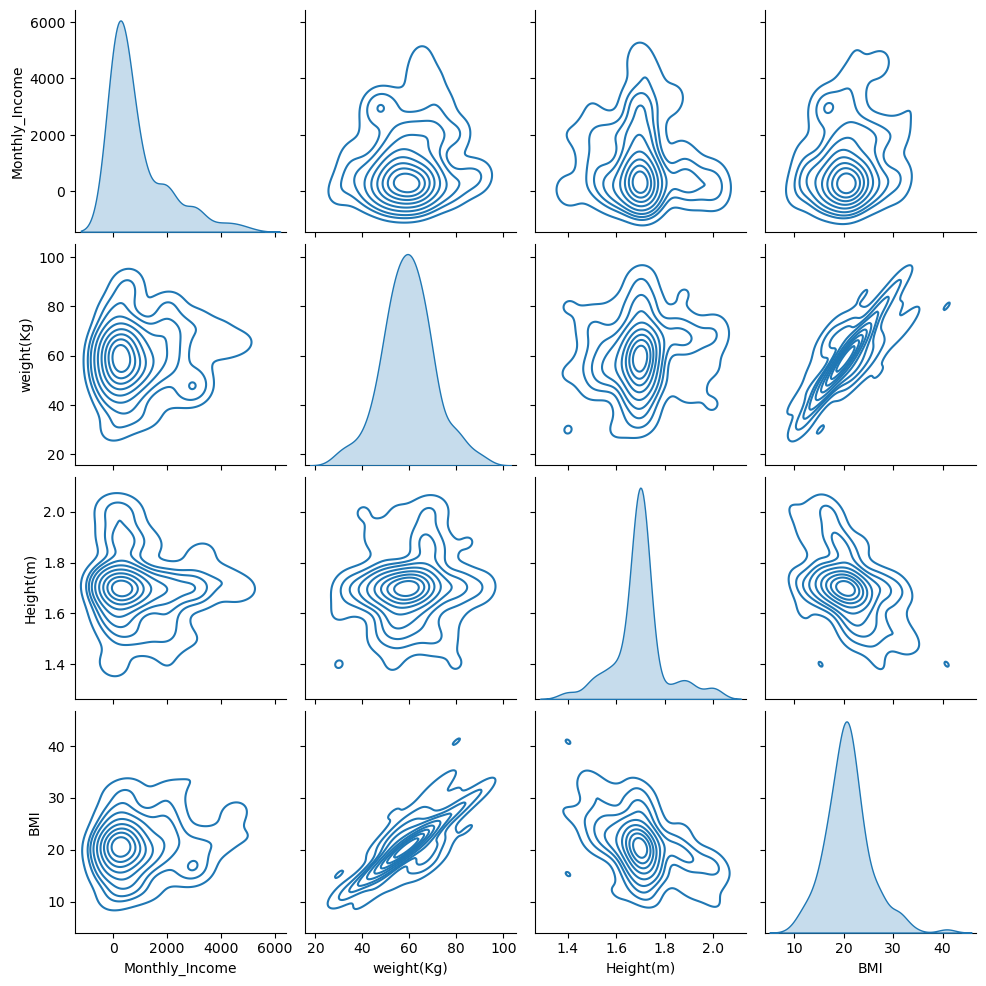

In [137]:
sns.pairplot(rubyfath,kind="kde")
plt.savefig("pkde.jpg")
plt.show()


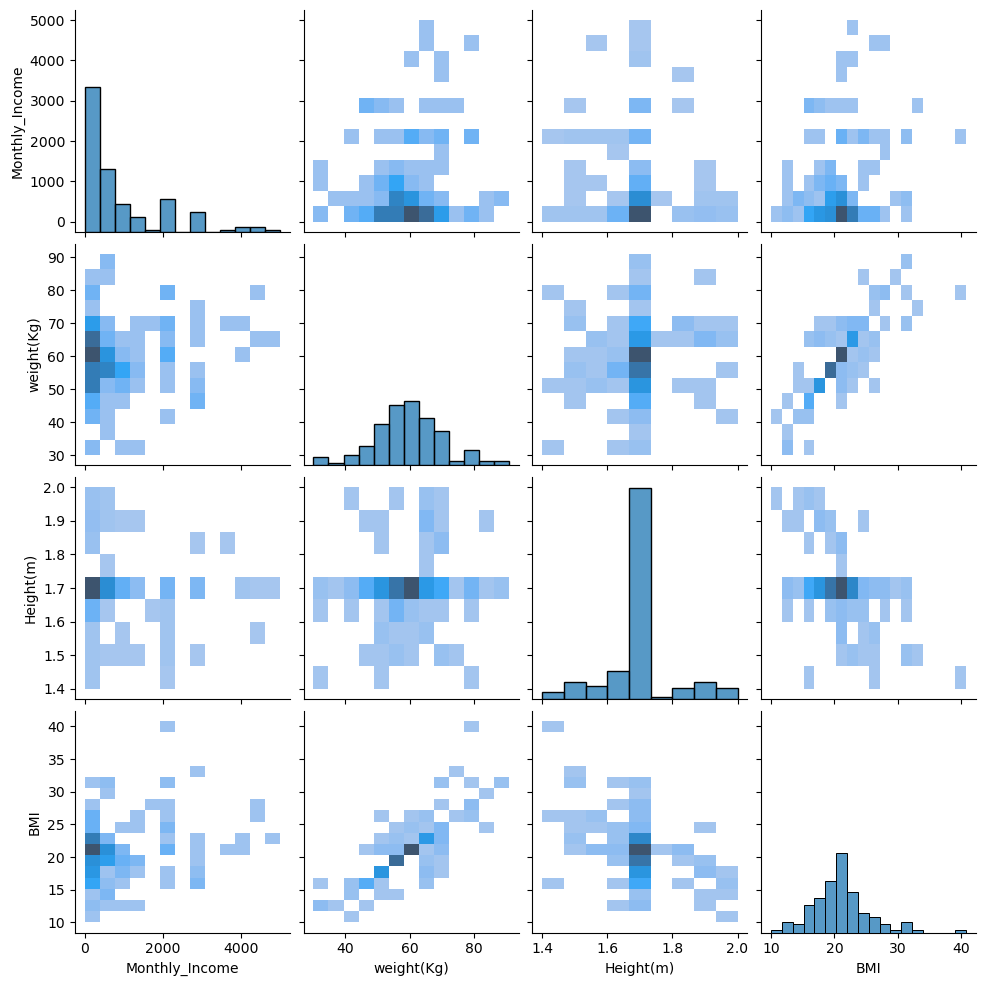

In [138]:
sns.pairplot(rubyfath,kind="hist")

plt.show()

In [139]:
#Try building a linear regression model for the prediction
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

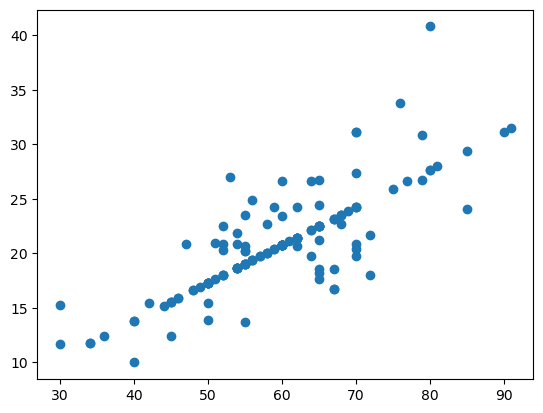

In [140]:
#Creating an object for the model
reg = LinearRegression()
plt.scatter(rubyfath["weight(Kg)"],rubyfath.BMI)

In [141]:
# ss=StandardScaler()
# ss.fit_transform(rubyfath[["weight(Kg)"]],rubyfath.BMI)
rubyfath["weight(Kg)"] = rubyfath["weight(Kg)"].array.reshape(-1,1)
rubyfath.BMI = rubyfath.BMI.array.reshape(-1,1)

In [142]:
rubyfath.sample()

,Timestamp,Timestamp.1,Region,Age_Range,Gender,Education_Level,Monthly_Income,weight(Kg),Height(m),Rainy_Season,Dry_Season,Body_Exercise,Diseases,BMI
119,12/20/2024 16:34:19,12/20/2024 16:34:19,Easten Region,15-20,Female,Tertiary,650.0,85.0,1.7,Carbohydrates,Carbohydrates,No,obesity,29.412


In [143]:
# fitting the model for weight and BMI
rubyfath.query("Gender == 'Male'")

,Timestamp,Timestamp.1,Region,Age_Range,Gender,Education_Level,Monthly_Income,weight(Kg),Height(m),Rainy_Season,Dry_Season,Body_Exercise,Diseases,BMI
0,12/15/2024 18:28:04,12/15/2024 18:28:04,Ashanti Region,20-25,Male,Tertiary,560.00,67.0,2.00,Carbohydrates,Protein,Yes,anemia,16.750
1,12/15/2024 18:45:00,12/15/2024 18:45:00,Bono East Region,20-25,Male,Tertiary,2000.00,80.0,1.40,Carbohydrates,Carbohydrates,Yes,obesity,40.816
2,12/15/2024 19:40:47,12/15/2024 19:40:47,Upper east Region,20-25,Male,Tertiary,1333.33,56.0,1.70,Carbohydrates,Vitamin,Yes,kwashiorkor,19.377
3,12/15/2024 19:53:18,12/15/2024 19:53:18,Upper east Region,20-25,Male,Tertiary,1000.00,67.0,1.90,Carbohydrates,Protein,Yes,NaN,18.560
4,12/15/2024 20:02:32,12/15/2024 20:02:32,Ahafo Region,20-25,Male,Tertiary,700.00,57.0,1.70,Carbohydrates,Protein,Yes,obesity,19.723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,12/22/2024 11:22:53,12/22/2024 11:22:53,Northen Region,20-25,Male,Tertiary,500.00,54.0,1.70,Carbohydrates,Carbohydrates,No,night blindness,18.685
140,12/22/2024 12:11:36,12/22/2024 12:11:36,Greater Accra Region,20-25,Male,Tertiary,380.00,85.0,1.88,Protein,Protein,Yes,NaN,24.049
143,12/23/2024 7:52:43,12/23/2024 7:52:43,Upper east Region,20-25,Male,Tertiary,20.00,64.0,1.70,Carbohydrates,Vitamin,Yes,anemia,22.145
144,12/23/2024 18:36:05,12/23/2024 18:36:05,Northen Region,15-20,Male,Tertiary,20.00,55.0,1.70,Protein,Carbohydrates,Yes,NaN,19.031


In [144]:
# PIPELINE CREATION


In [145]:
#y=mx + c
df = rubyfath.drop(["Timestamp","Timestamp.1"],axis=True)


In [146]:
df.isnull().sum()

Region              0
Age_Range           0
Gender              0
Education_Level     0
Monthly_Income      0
weight(Kg)          0
Height(m)           0
Rainy_Season        0
Dry_Season          0
Body_Exercise       0
Diseases           43
BMI                 0
dtype: int64

In [147]:
#Equation of the line
df.Age_Range.unique()

array(['20-25', '15-20', '35-40', '25-30', '30-35', '10-15'], dtype=object)

In [148]:
df.query("Age_Range == '20-25'").shape

(73, 12)

In [149]:
df.query("Age_Range == '15-20'").shape

(49, 12)

In [150]:
df.query("Age_Range == '35-40'").shape

(1, 12)

In [151]:
df.query("Age_Range == '25-30'").shape

(17, 12)

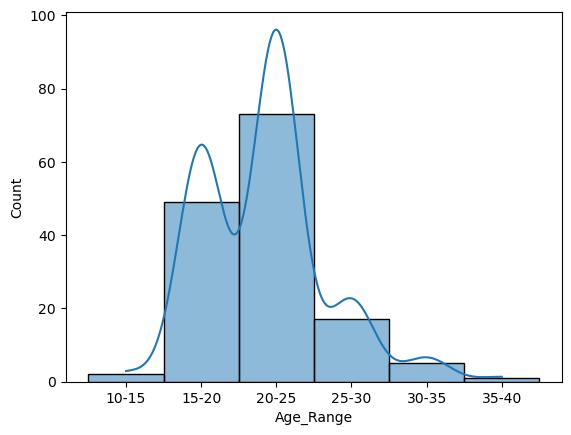

In [152]:
# Getting the number of people within a specific age range
sns.histplot(df.Age_Range.sort_values(),kde=True)

plt.show()

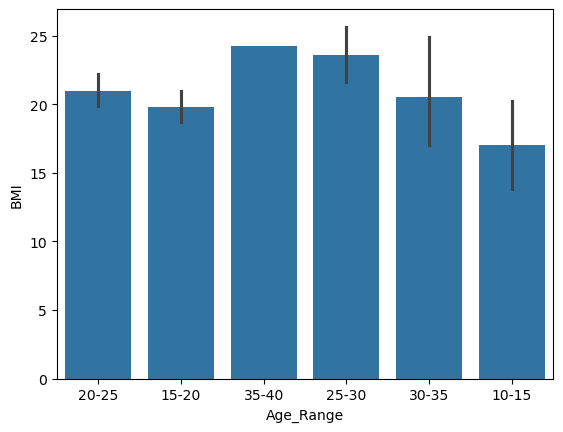

In [153]:
sort_age = df.Age_Range.sort_values()
sns.barplot(data=df,x='Age_Range',y='BMI')
plt.show()

In [154]:
#plot a confusion matrix


In [155]:
df.head()

,Region,Age_Range,Gender,Education_Level,Monthly_Income,weight(Kg),Height(m),Rainy_Season,Dry_Season,Body_Exercise,Diseases,BMI
0,Ashanti Region,20-25,Male,Tertiary,560.00,67.0,2.0,Carbohydrates,Protein,Yes,anemia,16.750
1,Bono East Region,20-25,Male,Tertiary,2000.00,80.0,1.4,Carbohydrates,Carbohydrates,Yes,obesity,40.816
2,Upper east Region,20-25,Male,Tertiary,1333.33,56.0,1.7,Carbohydrates,Vitamin,Yes,kwashiorkor,19.377
3,Upper east Region,20-25,Male,Tertiary,1000.00,67.0,1.9,Carbohydrates,Protein,Yes,NaN,18.560
4,Ahafo Region,20-25,Male,Tertiary,700.00,57.0,1.7,Carbohydrates,Protein,Yes,obesity,19.723


In [156]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor


In [157]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [158]:
df.Diseases.ffill(inplace=True)

In [159]:

df = df[df["Diseases"] != "malaria"]
df = df[df["Diseases"] != "headache"]
df = df[df["Diseases"] != "hypertension"]
df = df[df["Diseases"] != "muscle cramps"]
df = df.drop("Monthly_Income",axis=1)


In [160]:
df.Diseases.unique()

array(['anemia', 'obesity', 'kwashiorkor', 'scurvy', 'beriberi',
       'diabetes', 'asthma', 'ulcer', 'rickets', 'marasmus',
       'constipation', 'weight loss', 'night blindness'], dtype=object)

In [161]:
df.columns

Index(['Region', 'Age_Range', 'Gender', 'Education_Level', 'weight(Kg)',
       'Height(m)', 'Rainy_Season', 'Dry_Season', 'Body_Exercise', 'Diseases',
       'BMI'],
      dtype='object')

In [162]:
X = df.drop("Diseases",axis=1)
y = df.Diseases

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=50)

In [164]:
df.select_dtypes(include="object").columns

Index(['Region', 'Age_Range', 'Gender', 'Education_Level', 'Rainy_Season',
       'Dry_Season', 'Body_Exercise', 'Diseases'],
      dtype='object')

In [165]:
df.select_dtypes(exclude="object").columns

Index(['weight(Kg)', 'Height(m)', 'BMI'], dtype='object')

In [166]:
num_cols = ['weight(Kg)', 'Height(m)','BMI']

In [167]:
cat_cols = ['Region', 'Age_Range', 'Gender', 'Education_Level', 'Rainy_Season',
       'Dry_Season', 'Body_Exercise']

In [168]:
num_pipe = Pipeline(steps=[
    ("impute",SimpleImputer(strategy='mean')),
    ("scaler",MinMaxScaler())
])

In [169]:
cat_pipe = Pipeline(steps=[
    ("impute",SimpleImputer(strategy='most_frequent')),
    ("one-hot-encoder",OneHotEncoder(handle_unknown='ignore'))
])

In [170]:
transform_pipe = ColumnTransformer(transformers=[
    ("num_pipeline",num_pipe,num_cols),
    ("cat_pipline",cat_pipe,cat_cols)
], 
    n_jobs=-1,
    remainder='drop'
    
)

In [171]:
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, VotingRegressor, GradientBoostingRegressor

In [172]:
model = {
    "SVC":{
        "model":SVC(),
        "params":{ 'C':[1,10,20],'kernel':['rbf','linear']}
    },
    "DTC":{
        "model":DecisionTreeClassifier(),
        "params":{}
    },
    "RFC":{
        "model":RandomForestClassifier(),
        "params":{'n_estimators':[10,50,100,120],'criterion': ["gini", "entropy"]}
    },
    "GBC":{
         "model":GradientBoostingClassifier(),
         "params":{'n_estimators':[10,20,100,120],'loss':['log_loss', 'exponential']}
     }
    # "KNN":{
    #     "model":KNeighborsClassifier(),
    #     "params":{}
    # }
    
}

In [173]:
model_T = RandomForestClassifier(n_estimators=100,criterion='entropy')
best_mode = []

In [174]:
for name,mp in model.items():
    grid_pipe = GridSearchCV(mp["model"],mp["params"],cv=3,return_train_score=False)
    final_model = make_pipeline(transform_pipe,grid_pipe)
    final_model.fit(X_train,y_train)
    final_model.score(X_test,y_test)
    print(name, ":", final_model.score(X_test,y_test).round(3))
# y_train.head()

SVC : 0.188
DTC : 0.25
RFC : 0.406
GBC : 0.375


In [175]:
voting = VotingClassifier(estimators=[
    ("SVM",SVC()),
    ("DTC",DecisionTreeClassifier()),
    ("RFC",RandomForestClassifier()),
    ("GBC",GradientBoostingClassifier())
],
    voting='hard'
)

In [176]:
mk_pipe = make_pipeline(transform_pipe,voting)

In [177]:
mk_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['weight(Kg)', 'Height(m)',
                                                   'BMI']),
                                                 ('cat_pipline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot-encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Region', 'Age_Range',
                                                   'Gender', 'Education_Level',
                                                   'Rainy_Season', 'Dry_Season',
                                                   'Body_Exercise'])])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('SVM', SVC()),
                                              ('DTC', DecisionTreeClassifier()),
                                              ('RFC', RandomForestClassifier()),
                                              ('GBC',
                                               GradientBoostingClassifier())]))])

In [178]:
mk_pipe.score(X_test,y_test)

0.40625

In [179]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [180]:
y_predicted =mk_pipe.predict(X_test)

In [181]:
cm =  confusion_matrix(y_test,y_predicted)

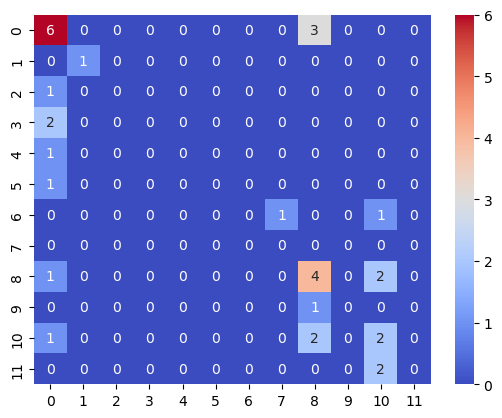

In [182]:
sns.heatmap(cm,annot=True,cmap='coolwarm')
plt.show()

In [183]:
rp = classification_report(y_test,y_predicted)

In [184]:
print(rp)

                 precision    recall  f1-score   support

         anemia       0.46      0.67      0.55         9
         asthma       1.00      1.00      1.00         1
       beriberi       0.00      0.00      0.00         1
   constipation       0.00      0.00      0.00         2
       diabetes       0.00      0.00      0.00         1
    kwashiorkor       0.00      0.00      0.00         1
       marasmus       0.00      0.00      0.00         2
night blindness       0.00      0.00      0.00         0
        obesity       0.40      0.57      0.47         7
        rickets       0.00      0.00      0.00         1
         scurvy       0.29      0.40      0.33         5
          ulcer       0.00      0.00      0.00         2

       accuracy                           0.41        32
      macro avg       0.18      0.22      0.20        32
   weighted avg       0.29      0.41      0.34        32



In [185]:
As = accuracy_score(y_test,y_predicted)

In [186]:
As

0.40625

In [187]:
df.columns

Index(['Region', 'Age_Range', 'Gender', 'Education_Level', 'weight(Kg)',
       'Height(m)', 'Rainy_Season', 'Dry_Season', 'Body_Exercise', 'Diseases',
       'BMI'],
      dtype='object')

In [188]:
from sklearn.preprocessing import LabelEncoder

In [189]:
df_new = df.copy()
df.head()

,Region,Age_Range,Gender,Education_Level,weight(Kg),Height(m),Rainy_Season,Dry_Season,Body_Exercise,Diseases,BMI
0,Ashanti Region,20-25,Male,Tertiary,67.0,2.0,Carbohydrates,Protein,Yes,anemia,16.750
1,Bono East Region,20-25,Male,Tertiary,80.0,1.4,Carbohydrates,Carbohydrates,Yes,obesity,40.816
2,Upper east Region,20-25,Male,Tertiary,56.0,1.7,Carbohydrates,Vitamin,Yes,kwashiorkor,19.377
3,Upper east Region,20-25,Male,Tertiary,67.0,1.9,Carbohydrates,Protein,Yes,kwashiorkor,18.560
4,Ahafo Region,20-25,Male,Tertiary,57.0,1.7,Carbohydrates,Protein,Yes,obesity,19.723


In [190]:
df_new.sample(3)

,Region,Age_Range,Gender,Education_Level,weight(Kg),Height(m),Rainy_Season,Dry_Season,Body_Exercise,Diseases,BMI
32,Upper east Region,15-20,Female,High School,75.0,1.70,Protein,Carbohydrates,No,anemia,25.952
72,Northen Region,20-25,Female,Tertiary,55.0,1.63,Carbohydrates,Carbohydrates,Yes,diabetes,20.701
101,Ashanti Region,15-20,Female,Tertiary,55.0,1.70,Protein,Carbohydrates,No,scurvy,19.031


In [191]:
X_l = df_new.drop("BMI",axis=1)
y_l = df_new['BMI']

In [192]:
from sklearn.preprocessing import StandardScaler

In [193]:
from sklearn.ensemble import RandomForestRegressor

In [194]:
X_trainl,X_testl,y_trainl,y_testl = train_test_split(X_l,y_l,test_size=0.25,random_state=40)

In [195]:
from sklearn.tree import DecisionTreeRegressor

In [196]:
model1 = DecisionTreeRegressor()

In [197]:
num_cols = ['weight(Kg)','Height(m)']
cat_cols = ['Gender','Education_Level','Rainy_Season','Dry_Season','Age_Range','Body_Exercise','Region','Diseases']

In [198]:
number_cols = Pipeline(steps=[
    ("impute",SimpleImputer(strategy="mean")),
    ("scale",StandardScaler())
])

In [199]:
categorical_cols = Pipeline(steps=[
    ("impute2",SimpleImputer(strategy="most_frequent")),
    ("one-hot-encoding",OneHotEncoder(handle_unknown='ignore'))
])

In [200]:
mk_trans = ColumnTransformer(transformers=[
    ("pipe1",number_cols,num_cols),
    ("pipe2",categorical_cols,cat_cols)
   ],
    remainder='drop'
)

In [201]:
votingR = VotingRegressor(estimators=[
    ("SVM",SVR()),
    ("DTC",DecisionTreeRegressor()),
    ("RFC",RandomForestRegressor()),
    ("GBC",GradientBoostingRegressor())
]
)

In [202]:
mk_pipe = make_pipeline(mk_trans,votingR)
mk_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe1',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['weight(Kg)', 'Height(m)']),
                                                 ('pipe2',
                                                  Pipeline(steps=[('impute2',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot-encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Education_Level',
                                                   'Rainy_Season', 'Dry_Season',
                                                   'Age_Range', 'Body_Exercise',
                                                   'Region', 'Diseases'])])),
                ('votingregressor',
                 VotingRegressor(estimators=[('SVM', SVR()),
                                             ('DTC', DecisionTreeRegressor()),
                                             ('RFC', RandomForestRegressor()),
                                             ('GBC',
                                              GradientBoostingRegressor())]))])

In [203]:
mk_pipe.fit(X_trainl,y_trainl)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe1',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['weight(Kg)', 'Height(m)']),
                                                 ('pipe2',
                                                  Pipeline(steps=[('impute2',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot-encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Education_Level',
                                                   'Rainy_Season', 'Dry_Season',
                                                   'Age_Range', 'Body_Exercise',
                                                   'Region', 'Diseases'])])),
                ('votingregressor',
                 VotingRegressor(estimators=[('SVM', SVR()),
                                             ('DTC', DecisionTreeRegressor()),
                                             ('RFC', RandomForestRegressor()),
                                             ('GBC',
                                              GradientBoostingRegressor())]))])

In [204]:
mk_pipe.score(X_testl,y_testl)

0.9507100546518408

In [205]:
import joblib as jb

In [206]:
jb.dump(mk_pipe,"final_model.pkl")

['final_model.pkl']

In [207]:
final_model = jb.load("final_model.pkl")

In [208]:
X_l[:3]

,Region,Age_Range,Gender,Education_Level,weight(Kg),Height(m),Rainy_Season,Dry_Season,Body_Exercise,Diseases
0,Ashanti Region,20-25,Male,Tertiary,67.0,2.0,Carbohydrates,Protein,Yes,anemia
1,Bono East Region,20-25,Male,Tertiary,80.0,1.4,Carbohydrates,Carbohydrates,Yes,obesity
2,Upper east Region,20-25,Male,Tertiary,56.0,1.7,Carbohydrates,Vitamin,Yes,kwashiorkor


In [209]:
final_model.predict(X_testl[5:10])

array([19.27936508, 21.45538055, 14.73724176, 17.40231192, 22.68562144])

In [210]:
y_testl[5:10].tolist()

[19.031, 21.453, 15.571, 16.609, 22.491]